### PART 1 Digit Recognition Using CNNs

6


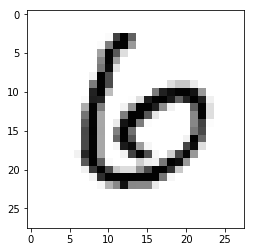

In [1]:
import tensorflow as tf
import numpy as np

mnist_digits = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
image_index = 11 
# You may select anything up to 60,000
print(y_test[image_index]) # The label is 8
plt.imshow(x_test[image_index], cmap='Greys')



In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout


def create_and_train_mnist_alexnet(learning_rate, activation, batch_size, epoch_size):
    mnist_digits = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
    img_shape = (28, 28)

    # print(x_train[0])
    print(x_train[0].shape)
    print(x_train.shape)

    x_train = np.expand_dims(x_train, 3)
    print(x_train.shape)

    y_train = np.expand_dims(y_train, 3)
    print(y_train[0].shape)
    
    x_test = np.expand_dims(x_test, 3)
    print(x_test.shape)

    y_test = np.expand_dims(y_test, 3)
    print(y_test[0].shape)

    # x_train = np.swapaxes(x_train,1,3)
    # print(x_train[0].shape)

    l2_reg = 0
    n_classes = 10
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=x_train[0].shape,
                       padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(384, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(256, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Layer 6
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(96, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 7
    alexnet.add(Flatten())
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation(activation))
    alexnet.add(Dropout(0.5))

    # Layer 9
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    alexnet.summary()

    adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # (4) Compile
    alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    # (5) Train
    alexnet.fit(x_train, y_train, batch_size=batch_size, epochs=epoch_size, validation_split=0.2, shuffle=True)
    
    return alexnet


In [3]:
trained_model = create_and_train_mnist_alexnet(0.01, 'relu',1024,50)

(28, 28)
(60000, 28, 28)
(60000, 28, 28, 1)
(1,)
(10000, 28, 28, 1)
(1,)


/home/codegenius/DevOps/VirtualEnvs/deepEnv-GPU/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
/home/codegenius/DevOps/VirtualEnvs/deepEnv-GPU/lib/python3.5/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 96)        11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 256)       0         
__________

Epoch 20/50
48000/48000 [==============================] - 25s 514us/step - loss: 0.0124 - acc: 0.9961 - val_loss: 0.0839 - val_acc: 0.9782
Epoch 21/50
48000/48000 [==============================] - 25s 512us/step - loss: 0.0111 - acc: 0.9966 - val_loss: 0.0621 - val_acc: 0.9835
Epoch 22/50
48000/48000 [==============================] - 25s 512us/step - loss: 0.0104 - acc: 0.9970 - val_loss: 0.0675 - val_acc: 0.9816
Epoch 23/50
48000/48000 [==============================] - 25s 515us/step - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0419 - val_acc: 0.9892
Epoch 24/50
48000/48000 [==============================] - 25s 515us/step - loss: 0.0095 - acc: 0.9971 - val_loss: 0.2236 - val_acc: 0.9487
Epoch 25/50
48000/48000 [==============================] - 25s 513us/step - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0660 - val_acc: 0.9844
Epoch 26/50
48000/48000 [==============================] - 25s 514us/step - loss: 0.0097 - acc: 0.9973 - val_loss: 0.0509 - val_acc: 0.9884
Epoch 27/50
48000/48

##### Epoch 100

In [4]:
(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

x_test = np.expand_dims(x_test, 3)
print(x_test.shape)

y_test = np.expand_dims(y_test, 3)
print(y_test[0].shape)

y_result = trained_model.predict(x_test)

#print("X=%s, Predicted=%s" % (x_test, y_result))

results = trained_model.evaluate(x_test,y_test)

print(results)


(10000, 28, 28, 1)
(1,)


/home/codegenius/DevOps/VirtualEnvs/deepEnv-GPU/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


10000/10000 [==============================] - 2s 178us/step
[0.058514260357405874, 0.985]


(28, 28)
(1,)
(28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28)
(28, 28, 1)
(1, 28, 28, 1)
[[[[  3]
   [  0]
   [  0]
   [  2]
   [  1]
   [  0]
   [  5]
   [  0]
   [  1]
   [  0]
   [  3]
   [  0]
   [  2]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  3]
   [  0]
   [  0]
   [  1]
   [  3]
   [  0]
   [  4]
   [  1]
   [  0]
   [  0]
   [  5]
   [  0]
   [  8]
   [  1]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  1]
   [  0]
   [  0]
   [  1]
   [  0]
   [  0]
   [  2]
   [  3]
   [  1]
   [  2]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  1]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  4]
   [  0]
   [  0]
   [  3]
   [  0]
   [  0]
   [  5]
   [  0]
   [  2]
   [  0]
   [  0]
   [  0]
   [  1]
   [  2]
   [  0]
   [  5]
   [  

/home/codegenius/DevOps/VirtualEnvs/deepEnv-GPU/lib/python3.5/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


[4.4859490e-08 9.9999666e-01 2.7987399e-08 4.9863318e-09 2.1758042e-06
 6.3913643e-07 2.9391822e-07 8.7310994e-08 8.8303302e-08 2.0168143e-08]


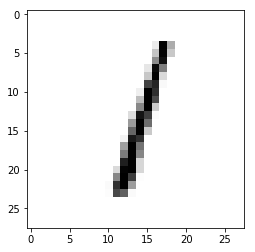

In [5]:
from IPython.display import Image as _Imgdis
from PIL import Image,ImageOps
from scipy import *
 
img = Image.open('two_test.jpg')

inverted_image = ImageOps.invert(img)

display(img)


data = np.asarray( inverted_image, dtype="int32" )

#data = np.expand_dims(data, 3)

plt.imshow(data, cmap='Greys')
print(data.shape)
data = np.expand_dims(data, 3)
print(y_test[0].shape)
print(x_test[0].shape)
print(x_test.shape)
print(x_train.shape)
print(data.shape)
data = np.expand_dims(data, 0)
print(data.shape)


print(data)
prediction = trained_model.predict(data)
print(prediction[0])

prediction = trained_model.predict(x_test)

(x_train2, y_train2), (x_test2, y_test2) = mnist_digits.load_data()

num = 2
print(prediction[num])

plt.imshow(x_test2[num], cmap='Greys')





### Part 2: Input Optimization for a CNN

(28, 28)


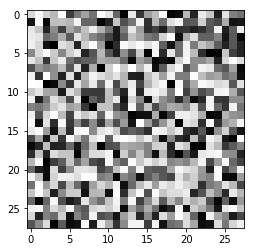

In [6]:
random_image = np.random.randint(255,size=(28,28))

#for x_i in range(0,28,1):
#    print(random_image[x_i])

print(random_image.shape)
plt.imshow(random_image, cmap='Greys')
    
normalized_image = random_image / 255

#print(normalized_image[0])




In [ ]:
from time import sleep
import math

normalized_vector = normalized_image.ravel()


model_input = np.expand_dims(random_image, 3)
model_input = np.expand_dims(model_input,0)
prediction = trained_model.predict(model_input)
label_input = np.zeros(model_input.shape,np.float64)
total_error=0
norm_input = model_input/255;
print("REAL")
np.set_printoptions(precision=8)
print(prediction[0])

interval =0.003
for test in range(0,614656,1):
    for x in range(0,28,1):
        for y in range(0,28,1):
            #print(model_input[0][x][y])
            
          
            if norm_input[0][x][y] < 0:
                norm_input[0][x][y] = 0
            elif norm_input[0][x][y] > 1:
                norm_input[0][x][y] = 1


            model_input1 = np.copy(norm_input)

            model_input2 = np.copy(norm_input)

            model_input1[0][x][y] += interval
            #print(model_input1[0][x][y]*255)
            
            if model_input1[0][x][y] > 1:
                 model_input1[0][x][y] = 1
            elif  model_input1[0][x][y] < 0
                 model_input1[0][x][y] = 0
                

            #print("+")

            prediction_plus = trained_model.predict(model_input1 * 255)
            #print(prediction[0])


            #print("-")
            #print(model_input2[0][x][y])
            model_input2[0][x][y] -= interval
            if model_input2[0][x][y] > 1:
                 model_input2[0][x][y] = 1
            elif  model_input2[0][x][y] < 0
                 model_input2[0][x][y] = 0
            #print(model_input2[0][x][y])

            #print(model_input2[0][x][y]*255)

            prediction_minus = trained_model.predict(model_input2 * 255)

            #print(prediction)

            #print(normalized_vector)
            #print(normalized_vector.shape)


            #print(label_input)


            # calcutate errors

            plus_error=0
            minus_error=0
            for a in range(0,9,1):
                if a==1 :
                     plus_error += abs(1-prediction[0][a]-prediction_plus[0][a])
                     minus_error += abs(1-prediction[0][a]-prediction_minus[0][a])
                else:
                    plus_error += abs(prediction[0][a]-prediction_plus[0][a])
                    minus_error += abs(prediction[0][a]-prediction_minus[0][a])

            #print("PLUS ERROR", plus_error)
            #print("MINUS_ERROR", minus_error)

            #print("pixel x,y %d,%d " % (x,y))
            if minus_error < plus_error:
                #label_input[0][x][y] += -1 * minus_error
                label_input[0][x][y] += -(minus_error**2)/784
                total_error+=minus_error**2
            else:
                #label_input[0][x][y] +=  plus_error
                label_input[0][x][y] +=  (plus_error**2)/784
                total_error+=plus_error**2
            #sleep(0.5)
                
    #print(total_error)
    #total_error = total_error/(784*98)

            #print(norm_input[0][0][0])
            #print((norm_input+(label_input*total_error))[0][0][0])

        #print(label_input/total_error)
    print("sample update previous",norm_input[0][0][0] )

    norm_input+=label_input
    print("sample update after",norm_input[0][0][0] )

    label_input = np.zeros(model_input.shape,np.float64)


    print("hoho iteration ", test)
    print("total_error: ", total_error)
    if total_error < 0.001:
        break
    else:
        print("continue...")
    total_error=0
    
   
    #print("hohos")
   


/home/codegenius/DevOps/VirtualEnvs/deepEnv-GPU/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


REAL
[2.7216965e-04 9.4526941e-01 4.4988751e-06 2.5726542e-06 5.3448204e-02
 8.4760587e-04 2.7276430e-05 1.8035722e-05 9.1994596e-05 1.8257721e-05]
sample update previous [0.25098039]
sample update after [0.25199195]
hoho iteration  0
total_error:  621.7588708772611
continue...
sample update previous [0.25199195]
sample update after [0.2530035]
hoho iteration  1
total_error:  621.7564780853291
continue...
sample update previous [0.2530035]
sample update after [0.25199195]
hoho iteration  2
total_error:  621.755910021116
continue...
sample update previous [0.25199195]
sample update after [0.2509804]
hoho iteration  3
total_error:  621.755213482899
continue...
sample update previous [0.2509804]
sample update after [0.24996885]
hoho iteration  4
total_error:  621.754315172746
continue...
sample update previous [0.24996885]
sample update after [0.2509804]
hoho iteration  5
total_error:  621.7535618648329
continue...
sample update previous [0.2509804]
sample update after [0.24996885]
hoho i

sample update previous [0.2388515]
sample update after [0.23784167]
hoho iteration  62
total_error:  620.7035616467576
continue...
sample update previous [0.23784167]
sample update after [0.23683198]
hoho iteration  63
total_error:  620.6144250977344
continue...
sample update previous [0.23683198]
sample update after [0.23582244]
hoho iteration  64
total_error:  620.5182320308817
continue...
sample update previous [0.23582244]
sample update after [0.23481308]
hoho iteration  65
total_error:  620.417011282006
continue...
sample update previous [0.23481308]
sample update after [0.23582227]
hoho iteration  66
total_error:  620.3086613327491
continue...
sample update previous [0.23582227]
sample update after [0.23481326]
hoho iteration  67
total_error:  620.1953843813264
continue...
sample update previous [0.23481326]
sample update after [0.23380445]
hoho iteration  68
total_error:  620.0773200040225
continue...
sample update previous [0.23380445]
sample update after [0.23279584]
hoho iter

sample update previous [0.22116154]
sample update after [0.22210894]
hoho iteration  125
total_error:  582.485622912759
continue...
sample update previous [0.22210894]
sample update after [0.22305291]
hoho iteration  126
total_error:  580.3816659827321
continue...
sample update previous [0.22305291]
sample update after [0.2239933]
hoho iteration  127
total_error:  578.1962849528545
continue...
sample update previous [0.2239933]
sample update after [0.22493]
hoho iteration  128
total_error:  575.9278240617031
continue...
sample update previous [0.22493]
sample update after [0.2258628]
hoho iteration  129
total_error:  573.5405239750216
continue...
sample update previous [0.2258628]
sample update after [0.22679148]
hoho iteration  130
total_error:  571.0109557956903
continue...
sample update previous [0.22679148]
sample update after [0.22771582]
hoho iteration  131
total_error:  568.3584212585653
continue...
sample update previous [0.22771582]
sample update after [0.22863565]
hoho iterat

sample update previous [0.26059935]
sample update after [0.26099958]
hoho iteration  187
total_error:  246.53469090004182
continue...
sample update previous [0.26099958]
sample update after [0.26139054]
hoho iteration  188
total_error:  240.83230113970168
continue...
sample update previous [0.26139054]
sample update after [0.26177252]
hoho iteration  189
total_error:  235.284008851428
continue...
sample update previous [0.26177252]
sample update after [0.26214561]
hoho iteration  190
total_error:  229.82010339848887
continue...
sample update previous [0.26214561]
sample update after [0.26251003]
hoho iteration  191
total_error:  224.47898636043774
continue...
sample update previous [0.26251003]
sample update after [0.26286605]
hoho iteration  192
total_error:  219.30602233480013
continue...
sample update previous [0.26286605]
sample update after [0.2632139]
hoho iteration  193
total_error:  214.26821636840157
continue...
sample update previous [0.2632139]
sample update after [0.2635537

sample update previous [0.27402872]
sample update after [0.27415042]
hoho iteration  249
total_error:  74.89980816871763
continue...
sample update previous [0.27415042]
sample update after [0.27427042]
hoho iteration  250
total_error:  73.85319849043921
continue...
sample update previous [0.27427042]
sample update after [0.27438877]
hoho iteration  251
total_error:  72.83005818896103
continue...
sample update previous [0.27438877]
sample update after [0.27450549]
hoho iteration  252
total_error:  71.83052485043227
continue...
sample update previous [0.27450549]
sample update after [0.27462063]
hoho iteration  253
total_error:  70.85504398775657
continue...
sample update previous [0.27462063]
sample update after [0.27473422]
hoho iteration  254
total_error:  69.90077935860151
continue...
sample update previous [0.27473422]
sample update after [0.2748463]
hoho iteration  255
total_error:  68.96960490710036
continue...
sample update previous [0.2748463]
sample update after [0.2749569]
hoh

sample update previous [0.27937764]
sample update after [0.27943878]
hoho iteration  311
total_error:  37.60616214542298
continue...
sample update previous [0.27943878]
sample update after [0.27949938]
hoho iteration  312
total_error:  37.26890845594509
continue...
sample update previous [0.27949938]
sample update after [0.27955943]
hoho iteration  313
total_error:  36.9359399765715
continue...
sample update previous [0.27955943]
sample update after [0.27961896]
hoho iteration  314
total_error:  36.60809498903807
continue...
sample update previous [0.27961896]
sample update after [0.27967796]
hoho iteration  315
total_error:  36.28553849982042
continue...
sample update previous [0.27967796]
sample update after [0.27973644]
hoho iteration  316
total_error:  35.96749672607883
continue...
sample update previous [0.27973644]
sample update after [0.27979441]
hoho iteration  317
total_error:  35.65405257495005
continue...
sample update previous [0.27979441]
sample update after [0.27985189]
h

sample update previous [0.28236898]
sample update after [0.28240699]
hoho iteration  373
total_error:  23.37255993868414
continue...
sample update previous [0.28240699]
sample update after [0.28244476]
hoho iteration  374
total_error:  23.220270443567237
continue...
sample update previous [0.28244476]
sample update after [0.28248229]
hoho iteration  375
total_error:  23.069776031974996
continue...
sample update previous [0.28248229]
sample update after [0.28251957]
hoho iteration  376
total_error:  22.920708156710788
continue...
sample update previous [0.28251957]
sample update after [0.28255661]
hoho iteration  377
total_error:  22.77320772876795
continue...
sample update previous [0.28255661]
sample update after [0.28259342]
hoho iteration  378
total_error:  22.62756100177111
continue...
sample update previous [0.28259342]
sample update after [0.28262999]
hoho iteration  379
total_error:  22.4833935493788
continue...
sample update previous [0.28262999]
sample update after [0.28266633

sample update previous [0.28436432]
sample update after [0.28439227]
hoho iteration  435
total_error:  17.17945947690633
continue...
sample update previous [0.28439227]
sample update after [0.28442013]
hoho iteration  436
total_error:  17.1178129281998
continue...
sample update previous [0.28442013]
sample update after [0.28444788]
hoho iteration  437
total_error:  17.05663423016638
continue...
sample update previous [0.28444788]
sample update after [0.28447554]
hoho iteration  438
total_error:  16.995888170336407
continue...
sample update previous [0.28447554]
sample update after [0.2845031]
hoho iteration  439
total_error:  16.935652228404898
continue...
sample update previous [0.2845031]
sample update after [0.28453056]
hoho iteration  440
total_error:  16.87586511146297
continue...
sample update previous [0.28453056]
sample update after [0.28455792]
hoho iteration  441
total_error:  16.816593980136073
continue...
sample update previous [0.28455792]
sample update after [0.28458519]


sample update previous [0.28593334]
sample update after [0.28595627]
hoho iteration  497
total_error:  14.091134668731916
continue...
sample update previous [0.28595627]
sample update after [0.28597913]
hoho iteration  498
total_error:  14.050514991406683
continue...
sample update previous [0.28597913]
sample update after [0.28600193]
hoho iteration  499
total_error:  14.010210233698306
continue...
sample update previous [0.28600193]
sample update after [0.28602466]
hoho iteration  500
total_error:  13.970160390206411
continue...
sample update previous [0.28602466]
sample update after [0.28604733]
hoho iteration  501
total_error:  13.930259517746764
continue...
sample update previous [0.28604733]
sample update after [0.28606994]
hoho iteration  502
total_error:  13.890575748076769
continue...
sample update previous [0.28606994]
sample update after [0.28609248]
hoho iteration  503
total_error:  13.851196161465
continue...
sample update previous [0.28609248]
sample update after [0.286114

sample update previous [0.28724265]
sample update after [0.28726209]
hoho iteration  559
total_error:  11.9429643295674
continue...
sample update previous [0.28726209]
sample update after [0.28728148]
hoho iteration  560
total_error:  11.913526373963839
continue...
sample update previous [0.28728148]
sample update after [0.28730082]
hoho iteration  561
total_error:  11.884220786390962
continue...
sample update previous [0.28730082]
sample update after [0.28732011]
hoho iteration  562
total_error:  11.855055020271061
continue...
sample update previous [0.28732011]
sample update after [0.28733935]
hoho iteration  563
total_error:  11.826022914371007
continue...
sample update previous [0.28733935]
sample update after [0.28735855]
hoho iteration  564
total_error:  11.797202133689229
continue...
sample update previous [0.28735855]
sample update after [0.2873777]
hoho iteration  565
total_error:  11.768434803094937
continue...
sample update previous [0.2873777]
sample update after [0.2873968

sample update previous [0.288365]
sample update after [0.28838185]
hoho iteration  621
total_error:  10.354907931276463
continue...
sample update previous [0.28838185]
sample update after [0.28839867]
hoho iteration  622
total_error:  10.333436331685729
continue...
sample update previous [0.28839867]
sample update after [0.28841545]
hoho iteration  623
total_error:  10.312065150950671
continue...
sample update previous [0.28841545]
sample update after [0.2884322]
hoho iteration  624
total_error:  10.290772613469729
continue...
sample update previous [0.2884322]
sample update after [0.28844891]
hoho iteration  625
total_error:  10.26956573167845
continue...
sample update previous [0.28844891]
sample update after [0.28846559]
hoho iteration  626
total_error:  10.24842707229593
continue...
sample update previous [0.28846559]
sample update after [0.28848223]
hoho iteration  627
total_error:  10.227357898445831
continue...
sample update previous [0.28848223]
sample update after [0.28849884]

sample update previous [0.28934828]
sample update after [0.2893632]
hoho iteration  683
total_error:  9.167931840065721
continue...
sample update previous [0.2893632]
sample update after [0.28937809]
hoho iteration  684
total_error:  9.15116145382382
continue...
sample update previous [0.28937809]
sample update after [0.28939296]
hoho iteration  685
total_error:  9.13448536342841
continue...
sample update previous [0.28939296]
sample update after [0.2894078]
hoho iteration  686
total_error:  9.117859399988339
continue...
sample update previous [0.2894078]
sample update after [0.28942261]
hoho iteration  687
total_error:  9.101321392089394
continue...
sample update previous [0.28942261]
sample update after [0.28943739]
hoho iteration  688
total_error:  9.084800173259381
continue...
sample update previous [0.28943739]
sample update after [0.28945215]
hoho iteration  689
total_error:  9.06830710061542
continue...
sample update previous [0.28945215]
sample update after [0.28946688]
hoho it

sample update previous [0.29022524]
sample update after [0.29023863]
hoho iteration  745
total_error:  8.232673758946646
continue...
sample update previous [0.29023863]
sample update after [0.29025201]
hoho iteration  746
total_error:  8.21899203084423
continue...
sample update previous [0.29025201]
sample update after [0.29026536]
hoho iteration  747
total_error:  8.205400957104462
continue...
sample update previous [0.29026536]
sample update after [0.29027869]
hoho iteration  748
total_error:  8.191815382887306
continue...
sample update previous [0.29027869]
sample update after [0.290292]
hoho iteration  749
total_error:  8.178274974835183
continue...
sample update previous [0.290292]
sample update after [0.29030529]
hoho iteration  750
total_error:  8.164808701612067
continue...
sample update previous [0.29030529]
sample update after [0.29031856]
hoho iteration  751
total_error:  8.151368629035064
continue...
sample update previous [0.29031856]
sample update after [0.2903318]
hoho i

sample update previous [0.29101643]
sample update after [0.29102857]
hoho iteration  807
total_error:  7.462192948541287
continue...
sample update previous [0.29102857]
sample update after [0.29104069]
hoho iteration  808
total_error:  7.450839747579252
continue...
sample update previous [0.29104069]
sample update after [0.2910528]
hoho iteration  809
total_error:  7.4395499737114985
continue...
sample update previous [0.2910528]
sample update after [0.29106489]
hoho iteration  810
total_error:  7.428276640687695
continue...
sample update previous [0.29106489]
sample update after [0.29107696]
hoho iteration  811
total_error:  7.417051574037393
continue...
sample update previous [0.29107696]
sample update after [0.29108901]
hoho iteration  812
total_error:  7.405809671747536
continue...
sample update previous [0.29108901]
sample update after [0.29110105]
hoho iteration  813
total_error:  7.394643871310939
continue...
sample update previous [0.29110105]
sample update after [0.29111306]
h

sample update previous [0.29173668]
sample update after [0.29174778]
hoho iteration  869
total_error:  6.8252198597710825
continue...
sample update previous [0.29174778]
sample update after [0.29175888]
hoho iteration  870
total_error:  6.815937073924288
continue...
sample update previous [0.29175888]
sample update after [0.29176995]
hoho iteration  871
total_error:  6.80672250348495
continue...
sample update previous [0.29176995]
sample update after [0.29178102]
hoho iteration  872
total_error:  6.797504401630159
continue...
sample update previous [0.29178102]
sample update after [0.29179206]
hoho iteration  873
total_error:  6.788323542121768
continue...
sample update previous [0.29179206]
sample update after [0.29180309]
hoho iteration  874
total_error:  6.779161293064458
continue...
sample update previous [0.29180309]
sample update after [0.29181411]
hoho iteration  875
total_error:  6.770044011474375
continue...
sample update previous [0.29181411]
sample update after [0.29182511]


sample update previous [0.29239831]
sample update after [0.29240855]
hoho iteration  931
total_error:  6.295518748057619
continue...
sample update previous [0.29240855]
sample update after [0.29241879]
hoho iteration  932
total_error:  6.287699654898983
continue...
sample update previous [0.29241879]
sample update after [0.29242901]
hoho iteration  933
total_error:  6.279895181265841
continue...
sample update previous [0.29242901]
sample update after [0.29243921]
hoho iteration  934
total_error:  6.272106637896069
continue...
sample update previous [0.29243921]
sample update after [0.29244941]
hoho iteration  935
total_error:  6.264315517597836
continue...
sample update previous [0.29244941]
sample update after [0.29245959]
hoho iteration  936
total_error:  6.256550691523917
continue...
sample update previous [0.29245959]
sample update after [0.29246976]
hoho iteration  937
total_error:  6.248804041920674
continue...
sample update previous [0.29246976]
sample update after [0.29247992]


sample update previous [0.29301058]
sample update after [0.29302009]
hoho iteration  993
total_error:  5.845807300663454
continue...
sample update previous [0.29302009]
sample update after [0.29302959]
hoho iteration  994
total_error:  5.8393677524734935
continue...
sample update previous [0.29302959]
sample update after [0.29303909]
hoho iteration  995
total_error:  5.832941718313392
continue...
sample update previous [0.29303909]
sample update after [0.29304857]
hoho iteration  996
total_error:  5.826539011352803
continue...
sample update previous [0.29304857]
sample update after [0.29305804]
hoho iteration  997
total_error:  5.82014162887463
continue...
sample update previous [0.29305804]
sample update after [0.2930675]
hoho iteration  998
total_error:  5.813755886576025
continue...
sample update previous [0.2930675]
sample update after [0.29307695]
hoho iteration  999
total_error:  5.807390455451403
continue...
sample update previous [0.29307695]
sample update after [0.29308639]
ho

sample update previous [0.29358148]
sample update after [0.29359039]
hoho iteration  1055
total_error:  5.47743849321829
continue...
sample update previous [0.29359039]
sample update after [0.2935993]
hoho iteration  1056
total_error:  5.472553360152041
continue...
sample update previous [0.2935993]
sample update after [0.29360819]
hoho iteration  1057
total_error:  5.467730012115226
continue...
sample update previous [0.29360819]
sample update after [0.29361708]
hoho iteration  1058
total_error:  5.462920907001237
continue...
sample update previous [0.29361708]
sample update after [0.29362596]
hoho iteration  1059
total_error:  5.458111804086015
continue...
sample update previous [0.29362596]
sample update after [0.29363484]
hoho iteration  1060
total_error:  5.453228474637446
continue...
sample update previous [0.29363484]
sample update after [0.2936437]
hoho iteration  1061
total_error:  5.448434316832864
continue...
sample update previous [0.2936437]
sample update after [0.29365256

sample update previous [0.29411972]
sample update after [0.29412818]
hoho iteration  1117
total_error:  5.1944870034261195
continue...
sample update previous [0.29412818]
sample update after [0.29413662]
hoho iteration  1118
total_error:  5.1901647164899885
continue...
sample update previous [0.29413662]
sample update after [0.29414506]
hoho iteration  1119
total_error:  5.185878238324875
continue...
sample update previous [0.29414506]
sample update after [0.29415349]
hoho iteration  1120
total_error:  5.1816194675287495
continue...
sample update previous [0.29415349]
sample update after [0.29416191]
hoho iteration  1121
total_error:  5.177369516488319
continue...
sample update previous [0.29416191]
sample update after [0.29417033]
hoho iteration  1122
total_error:  5.173101320592499
continue...
sample update previous [0.29417033]
sample update after [0.29417874]
hoho iteration  1123
total_error:  5.168856933040062
continue...
sample update previous [0.29417874]
sample update after [0.

sample update previous [0.29463098]
sample update after [0.29463902]
hoho iteration  1179
total_error:  4.941769830772693
continue...
sample update previous [0.29463902]
sample update after [0.29464706]
hoho iteration  1180
total_error:  4.9379368439111175
continue...
sample update previous [0.29464706]
sample update after [0.29465508]
hoho iteration  1181
total_error:  4.934076324090903
continue...
sample update previous [0.29465508]
sample update after [0.29466311]
hoho iteration  1182
total_error:  4.93024423474585
continue...
sample update previous [0.29466311]
sample update after [0.29467112]
hoho iteration  1183
total_error:  4.926422208734567
continue...
sample update previous [0.29467112]
sample update after [0.29467913]
hoho iteration  1184
total_error:  4.9225670458820545
continue...
sample update previous [0.29467913]
sample update after [0.29468713]
hoho iteration  1185
total_error:  4.91875609132472
continue...
sample update previous [0.29468713]
sample update after [0.294

sample update previous [0.29511805]
sample update after [0.29512572]
hoho iteration  1241
total_error:  4.714908615759017
continue...
sample update previous [0.29512572]
sample update after [0.29513339]
hoho iteration  1242
total_error:  4.711437108005334
continue...
sample update previous [0.29513339]
sample update after [0.29514105]
hoho iteration  1243
total_error:  4.707980031673562
continue...
sample update previous [0.29514105]
sample update after [0.2951487]
hoho iteration  1244
total_error:  4.704502187583544
continue...
sample update previous [0.2951487]
sample update after [0.29515635]
hoho iteration  1245
total_error:  4.7010376014542
continue...
sample update previous [0.29515635]
sample update after [0.29516399]
hoho iteration  1246
total_error:  4.697567127606682
continue...
sample update previous [0.29516399]
sample update after [0.29517163]
hoho iteration  1247
total_error:  4.694142734561998
continue...
sample update previous [0.29517163]
sample update after [0.2951792

sample update previous [0.29558325]
sample update after [0.29559059]
hoho iteration  1303
total_error:  4.50755426856189
continue...
sample update previous [0.29559059]
sample update after [0.29559791]
hoho iteration  1304
total_error:  4.504353636076811
continue...
sample update previous [0.29559791]
sample update after [0.29560524]
hoho iteration  1305
total_error:  4.501167678617996
continue...
sample update previous [0.29560524]
sample update after [0.29561256]
hoho iteration  1306
total_error:  4.4979834494568385
continue...
sample update previous [0.29561256]
sample update after [0.29561987]
hoho iteration  1307
total_error:  4.494825566955855
continue...
sample update previous [0.29561987]
sample update after [0.29562718]
hoho iteration  1308
total_error:  4.491644871168512
continue...
sample update previous [0.29562718]
sample update after [0.29563448]
hoho iteration  1309
total_error:  4.488477802880377
continue...
sample update previous [0.29563448]
sample update after [0.295

sample update previous [0.29602847]
sample update after [0.2960355]
hoho iteration  1365
total_error:  4.319271736747521
continue...
sample update previous [0.2960355]
sample update after [0.29604253]
hoho iteration  1366
total_error:  4.316391696126885
continue...
sample update previous [0.29604253]
sample update after [0.29604954]
hoho iteration  1367
total_error:  4.313511505525819
continue...
sample update previous [0.29604954]
sample update after [0.29605656]
hoho iteration  1368
total_error:  4.31063237410755
continue...
sample update previous [0.29605656]
sample update after [0.29606357]
hoho iteration  1369
total_error:  4.307766105223527
continue...
sample update previous [0.29606357]
sample update after [0.29607057]
hoho iteration  1370
total_error:  4.30490002476747
continue...
sample update previous [0.29607057]
sample update after [0.29607757]
hoho iteration  1371
total_error:  4.302020762265883
continue...
sample update previous [0.29607757]
sample update after [0.2960845

sample update previous [0.29645556]
sample update after [0.29646231]
hoho iteration  1427
total_error:  4.147269323247179
continue...
sample update previous [0.29646231]
sample update after [0.29646906]
hoho iteration  1428
total_error:  4.14460914683424
continue...
sample update previous [0.29646906]
sample update after [0.2964758]
hoho iteration  1429
total_error:  4.141983453062458
continue...
sample update previous [0.2964758]
sample update after [0.29648253]
hoho iteration  1430
total_error:  4.1393216113444415
continue...
sample update previous [0.29648253]
sample update after [0.29648926]
hoho iteration  1431
total_error:  4.136694294986455
continue...
sample update previous [0.29648926]
sample update after [0.29649599]
hoho iteration  1432
total_error:  4.134039723311606
continue...
sample update previous [0.29649599]
sample update after [0.29650271]
hoho iteration  1433
total_error:  4.131413194582715
continue...
sample update previous [0.29650271]
sample update after [0.29650

sample update previous [0.29686589]
sample update after [0.29687238]
hoho iteration  1489
total_error:  3.985800251674237
continue...
sample update previous [0.29687238]
sample update after [0.29687886]
hoho iteration  1490
total_error:  3.9832739748686925
continue...
sample update previous [0.29687886]
sample update after [0.29688534]
hoho iteration  1491
total_error:  3.9807440804626673
continue...
sample update previous [0.29688534]
sample update after [0.29689181]
hoho iteration  1492
total_error:  3.9782147248065916
continue...
sample update previous [0.29689181]
sample update after [0.29689828]
hoho iteration  1493
total_error:  3.9756874612332296
continue...
sample update previous [0.29689828]
sample update after [0.29690475]
hoho iteration  1494
total_error:  3.973163130478099
continue...
sample update previous [0.29690475]
sample update after [0.29691121]
hoho iteration  1495
total_error:  3.9706419903537324
continue...
sample update previous [0.29691121]
sample update after [

sample update previous [0.29725412]
sample update after [0.29726036]
hoho iteration  1550
total_error:  3.835812178551783
continue...
sample update previous [0.29726036]
sample update after [0.29726659]
hoho iteration  1551
total_error:  3.8334268329354035
continue...
sample update previous [0.29726659]
sample update after [0.29727283]
hoho iteration  1552
total_error:  3.831042835411829
continue...
sample update previous [0.29727283]
sample update after [0.29727906]
hoho iteration  1553
total_error:  3.8286886635533506
continue...
sample update previous [0.29727906]
sample update after [0.29728528]
hoho iteration  1554
total_error:  3.826314282631833
continue...
sample update previous [0.29728528]
sample update after [0.29729151]
hoho iteration  1555
total_error:  3.823968747450689
continue...
sample update previous [0.29729151]
sample update after [0.29729773]
hoho iteration  1556
total_error:  3.8215969902195313
continue...
sample update previous [0.29729773]
sample update after [0.

sample update previous [0.29763395]
sample update after [0.29763996]
hoho iteration  1612
total_error:  3.693415082931376
continue...
sample update previous [0.29763996]
sample update after [0.29764597]
hoho iteration  1613
total_error:  3.6911882501036626
continue...
sample update previous [0.29764597]
sample update after [0.29765197]
hoho iteration  1614
total_error:  3.6889627211730684
continue...
sample update previous [0.29765197]
sample update after [0.29765797]
hoho iteration  1615
total_error:  3.6867335680592617
continue...
sample update previous [0.29765797]
sample update after [0.29766396]
hoho iteration  1616
total_error:  3.6845115853185586
continue...
sample update previous [0.29766396]
sample update after [0.29766996]
hoho iteration  1617
total_error:  3.6822981800175465
continue...
sample update previous [0.29766996]
sample update after [0.29767594]
hoho iteration  1618
total_error:  3.6800818016809096
continue...
sample update previous [0.29767594]
sample update after 

sample update previous [0.29799984]
sample update after [0.29800563]
hoho iteration  1674
total_error:  3.5593711847315777
continue...
sample update previous [0.29800563]
sample update after [0.29801142]
hoho iteration  1675
total_error:  3.5572778449457694
continue...
sample update previous [0.29801142]
sample update after [0.29801721]
hoho iteration  1676
total_error:  3.5551824711353377
continue...
sample update previous [0.29801721]
sample update after [0.29802299]
hoho iteration  1677
total_error:  3.5531045377579917
continue...
sample update previous [0.29802299]
sample update after [0.29802877]
hoho iteration  1678
total_error:  3.551021310952185
continue...
sample update previous [0.29802877]
sample update after [0.29803454]
hoho iteration  1679
total_error:  3.5489390462599686
continue...
sample update previous [0.29803454]
sample update after [0.29804031]
hoho iteration  1680
total_error:  3.5468644258395523
continue...
sample update previous [0.29804031]
sample update after 

sample update previous [0.29834705]
sample update after [0.29835264]
hoho iteration  1735
total_error:  3.4354060741623775
continue...
sample update previous [0.29835264]
sample update after [0.29835823]
hoho iteration  1736
total_error:  3.4333771814481158
continue...
sample update previous [0.29835823]
sample update after [0.29836381]
hoho iteration  1737
total_error:  3.4313538255049862
continue...
sample update previous [0.29836381]
sample update after [0.29836939]
hoho iteration  1738
total_error:  3.4293414147329706
continue...
sample update previous [0.29836939]
sample update after [0.29837497]
hoho iteration  1739
total_error:  3.427328565573346
continue...
sample update previous [0.29837497]
sample update after [0.29838054]
hoho iteration  1740
total_error:  3.425300020436433
continue...
sample update previous [0.29838054]
sample update after [0.29838611]
hoho iteration  1741
total_error:  3.4232786534234965
continue...
sample update previous [0.29838611]
sample update after [

sample update previous [0.29868213]
sample update after [0.29868752]
hoho iteration  1796
total_error:  3.31449923427993
continue...
sample update previous [0.29868752]
sample update after [0.29869291]
hoho iteration  1797
total_error:  3.312532254198481
continue...
sample update previous [0.29869291]
sample update after [0.2986983]
hoho iteration  1798
total_error:  3.31055868250343
continue...
sample update previous [0.2986983]
sample update after [0.29870368]
hoho iteration  1799
total_error:  3.3085938253869553
continue...
sample update previous [0.29870368]
sample update after [0.29870906]
hoho iteration  1800
total_error:  3.3066331822818915
continue...
sample update previous [0.29870906]
sample update after [0.29871444]
hoho iteration  1801
total_error:  3.3046626102207823
continue...
sample update previous [0.29871444]
sample update after [0.29871981]
hoho iteration  1802
total_error:  3.30270283946751
continue...
sample update previous [0.29871981]
sample update after [0.29872

sample update previous [0.29901059]
sample update after [0.29901579]
hoho iteration  1858
total_error:  3.19597502554683
continue...
sample update previous [0.29901579]
sample update after [0.29902099]
hoho iteration  1859
total_error:  3.1940929600545656
continue...
sample update previous [0.29902099]
sample update after [0.29902619]
hoho iteration  1860
total_error:  3.192239925679494
continue...
sample update previous [0.29902619]
sample update after [0.29903138]
hoho iteration  1861
total_error:  3.1903792910543842
continue...
sample update previous [0.29903138]
sample update after [0.29903657]
hoho iteration  1862
total_error:  3.188520625201808
continue...
sample update previous [0.29903657]
sample update after [0.29904175]
hoho iteration  1863
total_error:  3.186659058613093
continue...
sample update previous [0.29904175]
sample update after [0.29904693]
hoho iteration  1864
total_error:  3.1847936984641527
continue...
sample update previous [0.29904693]
sample update after [0.2

sample update previous [0.29932238]
sample update after [0.2993274]
hoho iteration  1919
total_error:  3.084932499800986
continue...
sample update previous [0.2993274]
sample update after [0.29933242]
hoho iteration  1920
total_error:  3.0831590826153583
continue...
sample update previous [0.29933242]
sample update after [0.29933743]
hoho iteration  1921
total_error:  3.0813778499658295
continue...
sample update previous [0.29933743]
sample update after [0.29934244]
hoho iteration  1922
total_error:  3.0796080836135524
continue...
sample update previous [0.29934244]
sample update after [0.29934745]
hoho iteration  1923
total_error:  3.077833682502313
continue...
sample update previous [0.29934745]
sample update after [0.29935246]
hoho iteration  1924
total_error:  3.0760638639085833
continue...
sample update previous [0.29935246]
sample update after [0.29935746]
hoho iteration  1925
total_error:  3.07429188215084
continue...
sample update previous [0.29935746]
sample update after [0.29

sample update previous [0.2996234]
sample update after [0.29962825]
hoho iteration  1980
total_error:  2.9794230140619367
continue...
sample update previous [0.29962825]
sample update after [0.29963309]
hoho iteration  1981
total_error:  2.9777425904614785
continue...
sample update previous [0.29963309]
sample update after [0.29963794]
hoho iteration  1982
total_error:  2.976066041171715
continue...
sample update previous [0.29963794]
sample update after [0.29964278]
hoho iteration  1983
total_error:  2.9743891639628837
continue...
sample update previous [0.29964278]
sample update after [0.29964761]
hoho iteration  1984
total_error:  2.9727074779815092
continue...
sample update previous [0.29964761]
sample update after [0.29965245]
hoho iteration  1985
total_error:  2.971029133727424
continue...
sample update previous [0.29965245]
sample update after [0.29965728]
hoho iteration  1986
total_error:  2.9693560438001554
continue...
sample update previous [0.29965728]
sample update after [0

sample update previous [0.29991422]
sample update after [0.2999189]
hoho iteration  2041
total_error:  2.8786557359710265
continue...
sample update previous [0.2999189]
sample update after [0.29992358]
hoho iteration  2042
total_error:  2.8770108027479444
continue...
sample update previous [0.29992358]
sample update after [0.29992826]
hoho iteration  2043
total_error:  2.8753663567107384
continue...
sample update previous [0.29992826]
sample update after [0.29993294]
hoho iteration  2044
total_error:  2.8737274094711465
continue...
sample update previous [0.29993294]
sample update after [0.29993761]
hoho iteration  2045
total_error:  2.8720917472648733
continue...
sample update previous [0.29993761]
sample update after [0.29994229]
hoho iteration  2046
total_error:  2.870445983906965
continue...
sample update previous [0.29994229]
sample update after [0.29994695]
hoho iteration  2047
total_error:  2.8688112039578844
continue...
sample update previous [0.29994695]
sample update after [0

sample update previous [0.30019968]
sample update after [0.30020421]
hoho iteration  2103
total_error:  2.7789881614351164
continue...
sample update previous [0.30020421]
sample update after [0.30020873]
hoho iteration  2104
total_error:  2.7774072911372865
continue...
sample update previous [0.30020873]
sample update after [0.30021324]
hoho iteration  2105
total_error:  2.775827837387576
continue...
sample update previous [0.30021324]
sample update after [0.30021776]
hoho iteration  2106
total_error:  2.774245423441771
continue...
sample update previous [0.30021776]
sample update after [0.30022227]
hoho iteration  2107
total_error:  2.7726575641517184
continue...
sample update previous [0.30022227]
sample update after [0.30022678]
hoho iteration  2108
total_error:  2.7710907009452193
continue...
sample update previous [0.30022678]
sample update after [0.30023129]
hoho iteration  2109
total_error:  2.769511318429548
continue...
sample update previous [0.30023129]
sample update after [0

sample update previous [0.30047529]
sample update after [0.30047966]
hoho iteration  2165
total_error:  2.683201908376211
continue...
sample update previous [0.30047966]
sample update after [0.30048402]
hoho iteration  2166
total_error:  2.681689829815477
continue...
sample update previous [0.30048402]
sample update after [0.30048839]
hoho iteration  2167
total_error:  2.68017702138172
continue...
sample update previous [0.30048839]
sample update after [0.30049274]
hoho iteration  2168
total_error:  2.678671980908021
continue...
sample update previous [0.30049274]
sample update after [0.3004971]
hoho iteration  2169
total_error:  2.6771595858895982
continue...
sample update previous [0.3004971]
sample update after [0.30050146]
hoho iteration  2170
total_error:  2.675651468419827
continue...
sample update previous [0.30050146]
sample update after [0.30050581]
hoho iteration  2171
total_error:  2.6741469428696285
continue...
sample update previous [0.30050581]
sample update after [0.3005

sample update previous [0.30074145]
sample update after [0.30074567]
hoho iteration  2227
total_error:  2.5913664627410067
continue...
sample update previous [0.30074567]
sample update after [0.30074988]
hoho iteration  2228
total_error:  2.58990668136559
continue...
sample update previous [0.30074988]
sample update after [0.30075409]
hoho iteration  2229
total_error:  2.5884509537623486
continue...
sample update previous [0.30075409]
sample update after [0.3007583]
hoho iteration  2230
total_error:  2.5869826157291302
continue...
sample update previous [0.3007583]
sample update after [0.30076251]
hoho iteration  2231
total_error:  2.585517552373629
continue...
sample update previous [0.30076251]
sample update after [0.30076672]
hoho iteration  2232
total_error:  2.584062874753468
continue...
sample update previous [0.30076672]
sample update after [0.30077092]
hoho iteration  2233
total_error:  2.5826044392147693
continue...
sample update previous [0.30077092]
sample update after [0.30

sample update previous [0.30099848]
sample update after [0.30100255]
hoho iteration  2289
total_error:  2.5021199329756585
continue...
sample update previous [0.30100255]
sample update after [0.30100662]
hoho iteration  2290
total_error:  2.500697109742684
continue...
sample update previous [0.30100662]
sample update after [0.30101069]
hoho iteration  2291
total_error:  2.4992871574272764
continue...
sample update previous [0.30101069]
sample update after [0.30101476]
hoho iteration  2292
total_error:  2.4978703648162277
continue...
sample update previous [0.30101476]
sample update after [0.30101882]
hoho iteration  2293
total_error:  2.496458060216073
continue...
sample update previous [0.30101882]
sample update after [0.30102288]
hoho iteration  2294
total_error:  2.495047893771479
continue...
sample update previous [0.30102288]
sample update after [0.30102694]
hoho iteration  2295
total_error:  2.4936385426203618
continue...
sample update previous [0.30102694]
sample update after [0

sample update previous [0.30124272]
sample update after [0.30124666]
hoho iteration  2350
total_error:  2.4171671572685773
continue...
sample update previous [0.30124666]
sample update after [0.30125059]
hoho iteration  2351
total_error:  2.415803747868139
continue...
sample update previous [0.30125059]
sample update after [0.30125452]
hoho iteration  2352
total_error:  2.4144466377080667
continue...
sample update previous [0.30125452]
sample update after [0.30125845]
hoho iteration  2353
total_error:  2.4130960889055237
continue...
sample update previous [0.30125845]
sample update after [0.30126237]
hoho iteration  2354
total_error:  2.4117270153604395
continue...
sample update previous [0.30126237]
sample update after [0.30126629]
hoho iteration  2355
total_error:  2.410377132165098
continue...
sample update previous [0.30126629]
sample update after [0.30127022]
hoho iteration  2356
total_error:  2.4090128894036544
continue...
sample update previous [0.30127022]
sample update after [

sample update previous [0.30148249]
sample update after [0.30148629]
hoho iteration  2412
total_error:  2.336461400494311
continue...
sample update previous [0.30148629]
sample update after [0.30149009]
hoho iteration  2413
total_error:  2.335407394269643
continue...
sample update previous [0.30149009]
sample update after [0.30149388]
hoho iteration  2414
total_error:  2.3343389397217496
continue...
sample update previous [0.30149388]
sample update after [0.30149768]
hoho iteration  2415
total_error:  2.33328095163624
continue...
sample update previous [0.30149768]
sample update after [0.30150147]
hoho iteration  2416
total_error:  2.332237746282012
continue...
sample update previous [0.30150147]
sample update after [0.30150526]
hoho iteration  2417
total_error:  2.3311869746728346
continue...
sample update previous [0.30150526]
sample update after [0.30150905]
hoho iteration  2418
total_error:  2.330142345939713
continue...
sample update previous [0.30150905]
sample update after [0.30

sample update previous [0.30171125]
sample update after [0.30171495]
hoho iteration  2473
total_error:  2.2762314850023158
continue...
sample update previous [0.30171495]
sample update after [0.30171865]
hoho iteration  2474
total_error:  2.275294577539457
continue...
sample update previous [0.30171865]
sample update after [0.30172234]
hoho iteration  2475
total_error:  2.2743522693107816
continue...
sample update previous [0.30172234]
sample update after [0.30172604]
hoho iteration  2476
total_error:  2.2734110016173483
continue...
sample update previous [0.30172604]
sample update after [0.30172974]
hoho iteration  2477
total_error:  2.2724733057476727
continue...
sample update previous [0.30172974]
sample update after [0.30173343]
hoho iteration  2478
total_error:  2.271536740104155
continue...
sample update previous [0.30173343]
sample update after [0.30173712]
hoho iteration  2479
total_error:  2.270606349976229
continue...
sample update previous [0.30173712]
sample update after [0

sample update previous [0.30193424]
sample update after [0.30193785]
hoho iteration  2534
total_error:  2.220186831835709
continue...
sample update previous [0.30193785]
sample update after [0.30194146]
hoho iteration  2535
total_error:  2.2192851146207095
continue...
sample update previous [0.30194146]
sample update after [0.30194507]
hoho iteration  2536
total_error:  2.218394867471115
continue...
sample update previous [0.30194507]
sample update after [0.30194867]
hoho iteration  2537
total_error:  2.217497816967664
continue...
sample update previous [0.30194867]
sample update after [0.30195228]
hoho iteration  2538
total_error:  2.2166086360077695
continue...
sample update previous [0.30195228]
sample update after [0.30195588]
hoho iteration  2539
total_error:  2.2157180815593467
continue...
sample update previous [0.30195588]
sample update after [0.30195948]
hoho iteration  2540
total_error:  2.2148254512477457
continue...
sample update previous [0.30195948]
sample update after [0

sample update previous [0.30215181]
sample update after [0.30215533]
hoho iteration  2595
total_error:  2.1669500905457713
continue...
sample update previous [0.30215533]
sample update after [0.30215886]
hoho iteration  2596
total_error:  2.16609608042615
continue...
sample update previous [0.30215886]
sample update after [0.30216238]
hoho iteration  2597
total_error:  2.1652477850038885
continue...
sample update previous [0.30216238]
sample update after [0.30216589]
hoho iteration  2598
total_error:  2.164396904085125
continue...
sample update previous [0.30216589]
sample update after [0.30216941]
hoho iteration  2599
total_error:  2.16355421531445
continue...
sample update previous [0.30216941]
sample update after [0.30217293]
hoho iteration  2600
total_error:  2.1627056599415044
continue...
sample update previous [0.30217293]
sample update after [0.30217644]
hoho iteration  2601
total_error:  2.1618612058859177
continue...
sample update previous [0.30217644]
sample update after [0.3

sample update previous [0.30236766]
sample update after [0.3023711]
hoho iteration  2657
total_error:  2.1155291007061954
continue...
sample update previous [0.3023711]
sample update after [0.30237454]
hoho iteration  2658
total_error:  2.1147211587363266
continue...
sample update previous [0.30237454]
sample update after [0.30237797]
hoho iteration  2659
total_error:  2.1139154635606974
continue...
sample update previous [0.30237797]
sample update after [0.30238141]
hoho iteration  2660
total_error:  2.1131087036373115
continue...
sample update previous [0.30238141]
sample update after [0.30238484]
hoho iteration  2661
total_error:  2.112301614808886
continue...
sample update previous [0.30238484]
sample update after [0.30238828]
hoho iteration  2662
total_error:  2.1114924910905555
continue...
sample update previous [0.30238828]
sample update after [0.30239171]
hoho iteration  2663
total_error:  2.1106892650881814
continue...
sample update previous [0.30239171]
sample update after [0

sample update previous [0.30257507]
sample update after [0.30257843]
hoho iteration  2718
total_error:  2.0671785237098548
continue...
sample update previous [0.30257843]
sample update after [0.30258179]
hoho iteration  2719
total_error:  2.0664047572536246
continue...
sample update previous [0.30258179]
sample update after [0.30258514]
hoho iteration  2720
total_error:  2.0656378214455553
continue...
sample update previous [0.30258514]
sample update after [0.3025885]
hoho iteration  2721
total_error:  2.0648606572238224
continue...
sample update previous [0.3025885]
sample update after [0.30259186]
hoho iteration  2722
total_error:  2.0640939612848532
continue...
sample update previous [0.30259186]
sample update after [0.30259521]
hoho iteration  2723
total_error:  2.063323603696152
continue...
sample update previous [0.30259521]
sample update after [0.30259856]
hoho iteration  2724
total_error:  2.0625492999361104
continue...
sample update previous [0.30259856]
sample update after [0

sample update previous [0.30278107]
sample update after [0.30278436]
hoho iteration  2780
total_error:  2.020488299118135
continue...
sample update previous [0.30278436]
sample update after [0.30278764]
hoho iteration  2781
total_error:  2.019758733015546
continue...
sample update previous [0.30278764]
sample update after [0.30279092]
hoho iteration  2782
total_error:  2.0190271053197115
continue...
sample update previous [0.30279092]
sample update after [0.3027942]
hoho iteration  2783
total_error:  2.0182889470460648
continue...
sample update previous [0.3027942]
sample update after [0.30279748]
hoho iteration  2784
total_error:  2.0175549593967212
continue...
sample update previous [0.30279748]
sample update after [0.30280076]
hoho iteration  2785
total_error:  2.016819422424359
continue...
sample update previous [0.30280076]
sample update after [0.30280404]
hoho iteration  2786
total_error:  2.0160873868740117
continue...
sample update previous [0.30280404]
sample update after [0.3

sample update previous [0.30297927]
sample update after [0.30298249]
hoho iteration  2841
total_error:  1.9766360088960606
continue...
sample update previous [0.30298249]
sample update after [0.3029857]
hoho iteration  2842
total_error:  1.975936883844187
continue...
sample update previous [0.3029857]
sample update after [0.30298891]
hoho iteration  2843
total_error:  1.9752355379898237
continue...
sample update previous [0.30298891]
sample update after [0.30299212]
hoho iteration  2844
total_error:  1.9745304742589451
continue...
sample update previous [0.30299212]
sample update after [0.30299533]
hoho iteration  2845
total_error:  1.9738279247661707
continue...
sample update previous [0.30299533]
sample update after [0.30299853]
hoho iteration  2846
total_error:  1.9731250512060154
continue...
sample update previous [0.30299853]
sample update after [0.30300174]
hoho iteration  2847
total_error:  1.9724233724166034
continue...
sample update previous [0.30300174]
sample update after [0

sample update previous [0.30317321]
sample update after [0.30317635]
hoho iteration  2902
total_error:  1.9345779152433813
continue...
sample update previous [0.30317635]
sample update after [0.3031795]
hoho iteration  2903
total_error:  1.9339024121500352
continue...
sample update previous [0.3031795]
sample update after [0.30318264]
hoho iteration  2904
total_error:  1.9332289006276895
continue...
sample update previous [0.30318264]
sample update after [0.30318578]
hoho iteration  2905
total_error:  1.9325580990845612
continue...
sample update previous [0.30318578]
sample update after [0.30318892]
hoho iteration  2906
total_error:  1.9318825463069202
continue...
sample update previous [0.30318892]
sample update after [0.30319206]
hoho iteration  2907
total_error:  1.9312062082040338
continue...
sample update previous [0.30319206]
sample update after [0.3031952]
hoho iteration  2908
total_error:  1.9305317128023682
continue...
sample update previous [0.3031952]
sample update after [0.

sample update previous [0.30336305]
sample update after [0.30336613]
hoho iteration  2963
total_error:  1.8942912915669285
continue...
sample update previous [0.30336613]
sample update after [0.30336921]
hoho iteration  2964
total_error:  1.8936499202907195
continue...
sample update previous [0.30336921]
sample update after [0.30337229]
hoho iteration  2965
total_error:  1.8930021907799406
continue...
sample update previous [0.30337229]
sample update after [0.30337536]
hoho iteration  2966
total_error:  1.8923675844809051
continue...
sample update previous [0.30337536]
sample update after [0.30337844]
hoho iteration  2967
total_error:  1.8917260955383746
continue...
sample update previous [0.30337844]
sample update after [0.30338151]
hoho iteration  2968
total_error:  1.8910857827333039
continue...
sample update previous [0.30338151]
sample update after [0.30338458]
hoho iteration  2969
total_error:  1.8904482754058227
continue...
sample update previous [0.30338458]
sample update after

sample update previous [0.303549]
sample update after [0.30355201]
hoho iteration  3024
total_error:  1.8559866635643532
continue...
sample update previous [0.30355201]
sample update after [0.30355503]
hoho iteration  3025
total_error:  1.8553788633842399
continue...
sample update previous [0.30355503]
sample update after [0.30355804]
hoho iteration  3026
total_error:  1.8547667933257765
continue...
sample update previous [0.30355804]
sample update after [0.30356106]
hoho iteration  3027
total_error:  1.8541530955767431
continue...
sample update previous [0.30356106]
sample update after [0.30356407]
hoho iteration  3028
total_error:  1.853543641337562
continue...
sample update previous [0.30356407]
sample update after [0.30356708]
hoho iteration  3029
total_error:  1.8529328295922194
continue...
sample update previous [0.30356708]
sample update after [0.30357009]
hoho iteration  3030
total_error:  1.8523234233691634
continue...
sample update previous [0.30357009]
sample update after [0

sample update previous [0.30368316]
sample update after [0.30368611]
hoho iteration  3085
total_error:  1.8194272988871052
continue...
sample update previous [0.30368611]
sample update after [0.30368907]
hoho iteration  3086
total_error:  1.8188380990879442
continue...
sample update previous [0.30368907]
sample update after [0.30369203]
hoho iteration  3087
total_error:  1.8182527705224079
continue...
sample update previous [0.30369203]
sample update after [0.30369498]
hoho iteration  3088
total_error:  1.8176659394562416
continue...
sample update previous [0.30369498]
sample update after [0.30369793]
hoho iteration  3089
total_error:  1.8170849957592907
continue...
sample update previous [0.30369793]
sample update after [0.30370089]
hoho iteration  3090
total_error:  1.8164987123903573
continue...
sample update previous [0.30370089]
sample update after [0.30370384]
hoho iteration  3091
total_error:  1.8159144183835083
continue...
sample update previous [0.30370384]
sample update after

sample update previous [0.30386183]
sample update after [0.30386473]
hoho iteration  3146
total_error:  1.7843337406036435
continue...
sample update previous [0.30386473]
sample update after [0.30386763]
hoho iteration  3147
total_error:  1.7837722787827337
continue...
sample update previous [0.30386763]
sample update after [0.30387053]
hoho iteration  3148
total_error:  1.78320623329114
continue...
sample update previous [0.30387053]
sample update after [0.30387343]
hoho iteration  3149
total_error:  1.7826399457274262
continue...
sample update previous [0.30387343]
sample update after [0.30387632]
hoho iteration  3150
total_error:  1.7820707818449295
continue...
sample update previous [0.30387632]
sample update after [0.30387922]
hoho iteration  3151
total_error:  1.7815074514588602
continue...
sample update previous [0.30387922]
sample update after [0.30388211]
hoho iteration  3152
total_error:  1.7809478147643083
continue...
sample update previous [0.30388211]
sample update after [

sample update previous [0.30403709]
sample update after [0.30403993]
hoho iteration  3207
total_error:  1.7505731955382995
continue...
sample update previous [0.30403993]
sample update after [0.30404278]
hoho iteration  3208
total_error:  1.7500306853932737
continue...
sample update previous [0.30404278]
sample update after [0.30404562]
hoho iteration  3209
total_error:  1.7494905843316786
continue...
sample update previous [0.30404562]
sample update after [0.30404846]
hoho iteration  3210
total_error:  1.7489461197216283
continue...
sample update previous [0.30404846]
sample update after [0.30405131]
hoho iteration  3211
total_error:  1.7484048650678732
continue...
sample update previous [0.30405131]
sample update after [0.30405415]
hoho iteration  3212
total_error:  1.7478617956470184
continue...
sample update previous [0.30405415]
sample update after [0.30405699]
hoho iteration  3213
total_error:  1.7473210584538619
continue...
sample update previous [0.30405699]
sample update after

sample update previous [0.30420339]
sample update after [0.30420618]
hoho iteration  3268
total_error:  1.7180826278991737
continue...
sample update previous [0.30420618]
sample update after [0.30420897]
hoho iteration  3269
total_error:  1.7175634004688896
continue...
sample update previous [0.30420897]
sample update after [0.30421176]
hoho iteration  3270
total_error:  1.7170407096301692
continue...
sample update previous [0.30421176]
sample update after [0.30421455]
hoho iteration  3271
total_error:  1.716520225347162
continue...
sample update previous [0.30421455]
sample update after [0.30421734]
hoho iteration  3272
total_error:  1.7160025437175923
continue...
sample update previous [0.30421734]
sample update after [0.30422013]
hoho iteration  3273
total_error:  1.7154847731121716
continue...
sample update previous [0.30422013]
sample update after [0.30422292]
hoho iteration  3274
total_error:  1.7149651958673866
continue...
sample update previous [0.30422292]
sample update after 

sample update previous [0.3043722]
sample update after [0.30437494]
hoho iteration  3329
total_error:  1.6868923042251815
continue...
sample update previous [0.30437494]
sample update after [0.30437768]
hoho iteration  3330
total_error:  1.6863887377558229
continue...
sample update previous [0.30437768]
sample update after [0.30438042]
hoho iteration  3331
total_error:  1.6858858525763694
continue...
sample update previous [0.30438042]
sample update after [0.30438316]
hoho iteration  3332
total_error:  1.6853839059468794
continue...
sample update previous [0.30438316]
sample update after [0.3043859]
hoho iteration  3333
total_error:  1.684884861545239
continue...
sample update previous [0.3043859]
sample update after [0.30438863]
hoho iteration  3334
total_error:  1.6843833763189766
continue...
sample update previous [0.30438863]
sample update after [0.30439137]
hoho iteration  3335
total_error:  1.6838838127901683
continue...
sample update previous [0.30439137]
sample update after [0.

sample update previous [0.30453796]
sample update after [0.30454065]
hoho iteration  3390
total_error:  1.6567290514067619
continue...
sample update previous [0.30454065]
sample update after [0.30454334]
hoho iteration  3391
total_error:  1.6562386468266241
continue...
sample update previous [0.30454334]
sample update after [0.30454604]
hoho iteration  3392
total_error:  1.655752158459425
continue...
sample update previous [0.30454604]
sample update after [0.30454873]
hoho iteration  3393
total_error:  1.6552633335728801
continue...
sample update previous [0.30454873]
sample update after [0.30455142]
hoho iteration  3394
total_error:  1.654776334226935
continue...
sample update previous [0.30455142]
sample update after [0.3045541]
hoho iteration  3395
total_error:  1.6542895229518204
continue...
sample update previous [0.3045541]
sample update after [0.30455679]
hoho iteration  3396
total_error:  1.653798361587808
continue...
sample update previous [0.30455679]
sample update after [0.3

sample update previous [0.30470077]
sample update after [0.30470342]
hoho iteration  3451
total_error:  1.6275423836698175
continue...
sample update previous [0.30470342]
sample update after [0.30470606]
hoho iteration  3452
total_error:  1.6270718585872435
continue...
sample update previous [0.30470606]
sample update after [0.3047087]
hoho iteration  3453
total_error:  1.6265966060731702
continue...
sample update previous [0.3047087]
sample update after [0.30471135]
hoho iteration  3454
total_error:  1.6261276393542656
continue...
sample update previous [0.30471135]
sample update after [0.30471399]
hoho iteration  3455
total_error:  1.6256603590409058
continue...
sample update previous [0.30471399]
sample update after [0.30471663]
hoho iteration  3456
total_error:  1.625189032850029
continue...
sample update previous [0.30471663]
sample update after [0.30471927]
hoho iteration  3457
total_error:  1.6247197992426499
continue...
sample update previous [0.30471927]
sample update after [0

sample update previous [0.30486073]
sample update after [0.30486333]
hoho iteration  3512
total_error:  1.599326072202796
continue...
sample update previous [0.30486333]
sample update after [0.30486593]
hoho iteration  3513
total_error:  1.5988743350865473
continue...
sample update previous [0.30486593]
sample update after [0.30486853]
hoho iteration  3514
total_error:  1.598419902304107
continue...
sample update previous [0.30486853]
sample update after [0.30487113]
hoho iteration  3515
total_error:  1.5979662085444861
continue...
sample update previous [0.30487113]
sample update after [0.30487372]
hoho iteration  3516
total_error:  1.597514956800934
continue...
sample update previous [0.30487372]
sample update after [0.30487632]
hoho iteration  3517
total_error:  1.5970600213531536
continue...
sample update previous [0.30487632]
sample update after [0.30487891]
hoho iteration  3518
total_error:  1.5966079248920322
continue...
sample update previous [0.30487891]
sample update after [0

sample update previous [0.30487374]
sample update after [0.30487118]
hoho iteration  3573
total_error:  1.5722830672338237
continue...
sample update previous [0.30487118]
sample update after [0.30487374]
hoho iteration  3574
total_error:  1.5718464176592182
continue...
sample update previous [0.30487374]
sample update after [0.30487629]
hoho iteration  3575
total_error:  1.5714124846721425
continue...
sample update previous [0.30487629]
sample update after [0.30487374]
hoho iteration  3576
total_error:  1.5709824838273383
continue...
sample update previous [0.30487374]
sample update after [0.30487118]
hoho iteration  3577
total_error:  1.570547337733959
continue...
sample update previous [0.30487118]
sample update after [0.30487374]
hoho iteration  3578
total_error:  1.570119534453303
continue...
sample update previous [0.30487374]
sample update after [0.30487118]
hoho iteration  3579
total_error:  1.5696864544975613
continue...
sample update previous [0.30487118]
sample update after [

sample update previous [0.30491652]
sample update after [0.30491903]
hoho iteration  3634
total_error:  1.5463018581523646
continue...
sample update previous [0.30491903]
sample update after [0.30492155]
hoho iteration  3635
total_error:  1.545881972021451
continue...
sample update previous [0.30492155]
sample update after [0.30492406]
hoho iteration  3636
total_error:  1.5454602760880858
continue...
sample update previous [0.30492406]
sample update after [0.30492657]
hoho iteration  3637
total_error:  1.5450422053242656
continue...
sample update previous [0.30492657]
sample update after [0.30492908]
hoho iteration  3638
total_error:  1.5446242933440855
continue...
sample update previous [0.30492908]
sample update after [0.30493159]
hoho iteration  3639
total_error:  1.5442093175605622
continue...
sample update previous [0.30493159]
sample update after [0.3049341]
hoho iteration  3640
total_error:  1.5437894212338394
continue...
sample update previous [0.3049341]
sample update after [0

sample update previous [0.30501892]
sample update after [0.30502139]
hoho iteration  3695
total_error:  1.5211768101325454
continue...
sample update previous [0.30502139]
sample update after [0.30502386]
hoho iteration  3696
total_error:  1.5207713073793303
continue...
sample update previous [0.30502386]
sample update after [0.30502633]
hoho iteration  3697
total_error:  1.5203663796468443
continue...
sample update previous [0.30502633]
sample update after [0.3050288]
hoho iteration  3698
total_error:  1.5199573889846294
continue...
sample update previous [0.3050288]
sample update after [0.30503127]
hoho iteration  3699
total_error:  1.519556279852011
continue...
sample update previous [0.30503127]
sample update after [0.30503374]
hoho iteration  3700
total_error:  1.5191513918042097
continue...
sample update previous [0.30503374]
sample update after [0.30503621]
hoho iteration  3701
total_error:  1.518744867316203
continue...
sample update previous [0.30503621]
sample update after [0.

sample update previous [0.30516852]
sample update after [0.30517095]
hoho iteration  3756
total_error:  1.4967152732823652
continue...
sample update previous [0.30517095]
sample update after [0.30517338]
hoho iteration  3757
total_error:  1.4963210403001974
continue...
sample update previous [0.30517338]
sample update after [0.30517581]
hoho iteration  3758
total_error:  1.4959261666388481
continue...
sample update previous [0.30517581]
sample update after [0.30517824]
hoho iteration  3759
total_error:  1.4955267107543033
continue...
sample update previous [0.30517824]
sample update after [0.30518067]
hoho iteration  3760
total_error:  1.4951303602654014
continue...
sample update previous [0.30518067]
sample update after [0.3051831]
hoho iteration  3761
total_error:  1.4947359744059134
continue...
sample update previous [0.3051831]
sample update after [0.30518553]
hoho iteration  3762
total_error:  1.4943395196824225
continue...
sample update previous [0.30518553]
sample update after [

sample update previous [0.30531572]
sample update after [0.30531811]
hoho iteration  3817
total_error:  1.472924088231878
continue...
sample update previous [0.30531811]
sample update after [0.30532051]
hoho iteration  3818
total_error:  1.4725389194710912
continue...
sample update previous [0.30532051]
sample update after [0.3053229]
hoho iteration  3819
total_error:  1.4721577739803695
continue...
sample update previous [0.3053229]
sample update after [0.30532529]
hoho iteration  3820
total_error:  1.4717733964749657
continue...
sample update previous [0.30532529]
sample update after [0.30532768]
hoho iteration  3821
total_error:  1.4713957668549495
continue...
sample update previous [0.30532768]
sample update after [0.30533007]
hoho iteration  3822
total_error:  1.471012513959704
continue...
sample update previous [0.30533007]
sample update after [0.30533246]
hoho iteration  3823
total_error:  1.470632117593644
continue...
sample update previous [0.30533246]
sample update after [0.3

sample update previous [0.30537527]
sample update after [0.30537763]
hoho iteration  3878
total_error:  1.4502011824749097
continue...
sample update previous [0.30537763]
sample update after [0.30537998]
hoho iteration  3879
total_error:  1.4498366450511495
continue...
sample update previous [0.30537998]
sample update after [0.30538234]
hoho iteration  3880
total_error:  1.449476189148301
continue...
sample update previous [0.30538234]
sample update after [0.30538469]
hoho iteration  3881
total_error:  1.44911087905485
continue...
sample update previous [0.30538469]
sample update after [0.30538705]
hoho iteration  3882
total_error:  1.4487483550393012
continue...
sample update previous [0.30538705]
sample update after [0.3053894]
hoho iteration  3883
total_error:  1.4483882716820884
continue...
sample update previous [0.3053894]
sample update after [0.30539176]
hoho iteration  3884
total_error:  1.4480255693293551
continue...
sample update previous [0.30539176]
sample update after [0.3

sample update previous [0.30551795]
sample update after [0.30552027]
hoho iteration  3939
total_error:  1.428316312172713
continue...
sample update previous [0.30552027]
sample update after [0.30552259]
hoho iteration  3940
total_error:  1.427970878932609
continue...
sample update previous [0.30552259]
sample update after [0.30552491]
hoho iteration  3941
total_error:  1.4276156317961068
continue...
sample update previous [0.30552491]
sample update after [0.30552723]
hoho iteration  3942
total_error:  1.4272725243199744
continue...
sample update previous [0.30552723]
sample update after [0.30552955]
hoho iteration  3943
total_error:  1.426914745506648
continue...
sample update previous [0.30552955]
sample update after [0.30553187]
hoho iteration  3944
total_error:  1.426571786121882
continue...
sample update previous [0.30553187]
sample update after [0.30553418]
hoho iteration  3945
total_error:  1.4262179066585512
continue...
sample update previous [0.30553418]
sample update after [0.

sample update previous [0.3056585]
sample update after [0.30566078]
hoho iteration  4000
total_error:  1.4071825804310532
continue...
sample update previous [0.30566078]
sample update after [0.30566307]
hoho iteration  4001
total_error:  1.4068446753961708
continue...
sample update previous [0.30566307]
sample update after [0.30566535]
hoho iteration  4002
total_error:  1.4064967955236016
continue...
sample update previous [0.30566535]
sample update after [0.30566764]
hoho iteration  4003
total_error:  1.4061601927953804
continue...
sample update previous [0.30566764]
sample update after [0.30566992]
hoho iteration  4004
total_error:  1.4058193889918673
continue...
sample update previous [0.30566992]
sample update after [0.30567221]
hoho iteration  4005
total_error:  1.4054791231131518
continue...
sample update previous [0.30567221]
sample update after [0.30567449]
hoho iteration  4006
total_error:  1.4051398169568192
continue...
sample update previous [0.30567449]
sample update after 

sample update previous [0.30579698]
sample update after [0.30579923]
hoho iteration  4061
total_error:  1.3866979883212216
continue...
sample update previous [0.30579923]
sample update after [0.30580148]
hoho iteration  4062
total_error:  1.386368660763068
continue...
sample update previous [0.30580148]
sample update after [0.30580373]
hoho iteration  4063
total_error:  1.3860349671910788
continue...
sample update previous [0.30580373]
sample update after [0.30580599]
hoho iteration  4064
total_error:  1.385704392927797
continue...
sample update previous [0.30580599]
sample update after [0.30580824]
hoho iteration  4065
total_error:  1.385374335066846
continue...
sample update previous [0.30580824]
sample update after [0.30581049]
hoho iteration  4066
total_error:  1.3850449948323456
continue...
sample update previous [0.30581049]
sample update after [0.30581274]
hoho iteration  4067
total_error:  1.384711679979858
continue...
sample update previous [0.30581274]
sample update after [0.

sample update previous [0.30593346]
sample update after [0.30593568]
hoho iteration  4122
total_error:  1.3669019868910466
continue...
sample update previous [0.30593568]
sample update after [0.3059379]
hoho iteration  4123
total_error:  1.3665848446973488
continue...
sample update previous [0.3059379]
sample update after [0.30594012]
hoho iteration  4124
total_error:  1.3662656393864858
continue...
sample update previous [0.30594012]
sample update after [0.30594234]
hoho iteration  4125
total_error:  1.3659482717120648
continue...
sample update previous [0.30594234]
sample update after [0.30594456]
hoho iteration  4126
total_error:  1.3656340575300516
continue...
sample update previous [0.30594456]
sample update after [0.30594678]
hoho iteration  4127
total_error:  1.3653132578809986
continue...
sample update previous [0.30594678]
sample update after [0.305949]
hoho iteration  4128
total_error:  1.3650005836564858
continue...
sample update previous [0.305949]
sample update after [0.30

sample update previous [0.30606359]
sample update after [0.30606578]
hoho iteration  4183
total_error:  1.3477249513755383
continue...
sample update previous [0.30606578]
sample update after [0.30606797]
hoho iteration  4184
total_error:  1.3474092992558793
continue...
sample update previous [0.30606797]
sample update after [0.30607016]
hoho iteration  4185
total_error:  1.3471054408668013
continue...
sample update previous [0.30607016]
sample update after [0.30607234]
hoho iteration  4186
total_error:  1.346793410472099
continue...
sample update previous [0.30607234]
sample update after [0.30607453]
hoho iteration  4187
total_error:  1.3464846932263606
continue...
sample update previous [0.30607453]
sample update after [0.30607672]
hoho iteration  4188
total_error:  1.346172696161434
continue...
sample update previous [0.30607672]
sample update after [0.30607891]
hoho iteration  4189
total_error:  1.345860071329726
continue...
sample update previous [0.30607891]
sample update after [0

sample update previous [0.30618322]
sample update after [0.30618537]
hoho iteration  4244
total_error:  1.3289318056711854
continue...
sample update previous [0.30618537]
sample update after [0.30618753]
hoho iteration  4245
total_error:  1.3286275173970707
continue...
sample update previous [0.30618753]
sample update after [0.30618538]
hoho iteration  4246
total_error:  1.3283207092498186
continue...
sample update previous [0.30618538]
sample update after [0.30618753]
hoho iteration  4247
total_error:  1.3280235372106641
continue...
sample update previous [0.30618753]
sample update after [0.30618538]
hoho iteration  4248
total_error:  1.3277190951785864
continue...
sample update previous [0.30618538]
sample update after [0.30618753]
hoho iteration  4249
total_error:  1.3274195122457004
continue...
sample update previous [0.30618753]
sample update after [0.30618538]
hoho iteration  4250
total_error:  1.32711249071788
continue...
sample update previous [0.30618538]
sample update after [

sample update previous [0.30624529]
sample update after [0.30624317]
hoho iteration  4305
total_error:  1.3106667834044354
continue...
sample update previous [0.30624317]
sample update after [0.30624529]
hoho iteration  4306
total_error:  1.310372868149822
continue...
sample update previous [0.30624529]
sample update after [0.30624317]
hoho iteration  4307
total_error:  1.3100739654815778
continue...
sample update previous [0.30624317]
sample update after [0.30624529]
hoho iteration  4308
total_error:  1.3097792865040692
continue...
sample update previous [0.30624529]
sample update after [0.30624317]
hoho iteration  4309
total_error:  1.3094817375744505
continue...
sample update previous [0.30624317]
sample update after [0.30624529]
hoho iteration  4310
total_error:  1.3091915739569144
continue...
sample update previous [0.30624529]
sample update after [0.30624317]
hoho iteration  4311
total_error:  1.3088908340464065
continue...
sample update previous [0.30624317]
sample update after 

sample update previous [0.30626015]
sample update after [0.30625805]
hoho iteration  4366
total_error:  1.2928498709891227
continue...
sample update previous [0.30625805]
sample update after [0.30626015]
hoho iteration  4367
total_error:  1.2925643508600722
continue...
sample update previous [0.30626015]
sample update after [0.30625805]
hoho iteration  4368
total_error:  1.2922727024073597
continue...
sample update previous [0.30625805]
sample update after [0.30625595]
hoho iteration  4369
total_error:  1.2919866197401082
continue...
sample update previous [0.30625595]
sample update after [0.30625386]
hoho iteration  4370
total_error:  1.2917030680588488
continue...
sample update previous [0.30625386]
sample update after [0.30625176]
hoho iteration  4371
total_error:  1.2914122040203437
continue...
sample update previous [0.30625176]
sample update after [0.30625386]
hoho iteration  4372
total_error:  1.291130723700772
continue...
sample update previous [0.30625386]
sample update after 

sample update previous [0.3061579]
sample update after [0.30615583]
hoho iteration  4427
total_error:  1.2755547281696378
continue...
sample update previous [0.30615583]
sample update after [0.3061579]
hoho iteration  4428
total_error:  1.2752784860806403
continue...
sample update previous [0.3061579]
sample update after [0.30615583]
hoho iteration  4429
total_error:  1.274992704109324
continue...
sample update previous [0.30615583]
sample update after [0.30615376]
hoho iteration  4430
total_error:  1.2747154901517777
continue...
sample update previous [0.30615376]
sample update after [0.30615169]
hoho iteration  4431
total_error:  1.2744362796434523
continue...
sample update previous [0.30615169]
sample update after [0.30614962]
hoho iteration  4432
total_error:  1.2741563948689947
continue...
sample update previous [0.30614962]
sample update after [0.30614755]
hoho iteration  4433
total_error:  1.2738766285929002
continue...
sample update previous [0.30614755]
sample update after [0.

sample update previous [0.30605289]
sample update after [0.30605085]
hoho iteration  4488
total_error:  1.2587092797319175
continue...
sample update previous [0.30605085]
sample update after [0.3060488]
hoho iteration  4489
total_error:  1.2584339745367525
continue...
sample update previous [0.3060488]
sample update after [0.30605085]
hoho iteration  4490
total_error:  1.2581624036520342
continue...
sample update previous [0.30605085]
sample update after [0.3060488]
hoho iteration  4491
total_error:  1.257888619836022
continue...
sample update previous [0.3060488]
sample update after [0.30604676]
hoho iteration  4492
total_error:  1.2576153126320992
continue...
sample update previous [0.30604676]
sample update after [0.30604472]
hoho iteration  4493
total_error:  1.2573401086755547
continue...
sample update previous [0.30604472]
sample update after [0.30604267]
hoho iteration  4494
total_error:  1.2570724545379792
continue...
sample update previous [0.30604267]
sample update after [0.3

sample update previous [0.3059493]
sample update after [0.30594729]
hoho iteration  4549
total_error:  1.2424084315467898
continue...
sample update previous [0.30594729]
sample update after [0.30594527]
hoho iteration  4550
total_error:  1.242148914588285
continue...
sample update previous [0.30594527]
sample update after [0.30594325]
hoho iteration  4551
total_error:  1.2418828207143555
continue...
sample update previous [0.30594325]
sample update after [0.30594123]
hoho iteration  4552
total_error:  1.2416268453681854
continue...
sample update previous [0.30594123]
sample update after [0.30593922]
hoho iteration  4553
total_error:  1.241363043452527
continue...
sample update previous [0.30593922]
sample update after [0.3059372]
hoho iteration  4554
total_error:  1.241106865483509
continue...
sample update previous [0.3059372]
sample update after [0.30593518]
hoho iteration  4555
total_error:  1.2408456005347848
continue...
sample update previous [0.30593518]
sample update after [0.30

sample update previous [0.30582695]
sample update after [0.30582495]
hoho iteration  4610
total_error:  1.2266415302352134
continue...
sample update previous [0.30582495]
sample update after [0.30582296]
hoho iteration  4611
total_error:  1.226384377075692
continue...
sample update previous [0.30582296]
sample update after [0.30582097]
hoho iteration  4612
total_error:  1.2261296094437422
continue...
sample update previous [0.30582097]
sample update after [0.30581898]
hoho iteration  4613
total_error:  1.2258757015628636
continue...
sample update previous [0.30581898]
sample update after [0.30581699]
hoho iteration  4614
total_error:  1.2256202499593971
continue...
sample update previous [0.30581699]
sample update after [0.30581499]
hoho iteration  4615
total_error:  1.225364926741618
continue...
sample update previous [0.30581499]
sample update after [0.305813]
hoho iteration  4616
total_error:  1.2251118653361
continue...
sample update previous [0.305813]
sample update after [0.30581

sample update previous [0.30570614]
sample update after [0.30570417]
hoho iteration  4671
total_error:  1.2112445485935033
continue...
sample update previous [0.30570417]
sample update after [0.3057022]
hoho iteration  4672
total_error:  1.2109930404383087
continue...
sample update previous [0.3057022]
sample update after [0.30570023]
hoho iteration  4673
total_error:  1.21074509944319
continue...
sample update previous [0.30570023]
sample update after [0.30569827]
hoho iteration  4674
total_error:  1.2104979202410833
continue...
sample update previous [0.30569827]
sample update after [0.3056963]
hoho iteration  4675
total_error:  1.2102485520104094
continue...
sample update previous [0.3056963]
sample update after [0.30569434]
hoho iteration  4676
total_error:  1.2099994921100923
continue...
sample update previous [0.30569434]
sample update after [0.30569237]
hoho iteration  4677
total_error:  1.2097507877148188
continue...
sample update previous [0.30569237]
sample update after [0.30

sample update previous [0.30558683]
sample update after [0.30558489]
hoho iteration  4732
total_error:  1.196313872922091
continue...
sample update previous [0.30558489]
sample update after [0.30558295]
hoho iteration  4733
total_error:  1.1960677205476677
continue...
sample update previous [0.30558295]
sample update after [0.305581]
hoho iteration  4734
total_error:  1.1958289173002774
continue...
sample update previous [0.305581]
sample update after [0.30557906]
hoho iteration  4735
total_error:  1.195583137612173
continue...
sample update previous [0.30557906]
sample update after [0.30557712]
hoho iteration  4736
total_error:  1.1953442855091496
continue...
sample update previous [0.30557712]
sample update after [0.30557518]
hoho iteration  4737
total_error:  1.19509809729187
continue...
sample update previous [0.30557518]
sample update after [0.30557324]
hoho iteration  4738
total_error:  1.194857943158032
continue...
sample update previous [0.30557324]
sample update after [0.30557

sample update previous [0.30560776]
sample update after [0.30560968]
hoho iteration  4793
total_error:  1.1817726382557476
continue...
sample update previous [0.30560968]
sample update after [0.3056116]
hoho iteration  4794
total_error:  1.1815398604120537
continue...
sample update previous [0.3056116]
sample update after [0.30561352]
hoho iteration  4795
total_error:  1.1813082520851734
continue...
sample update previous [0.30561352]
sample update after [0.30561543]
hoho iteration  4796
total_error:  1.1810757455123981
continue...
sample update previous [0.30561543]
sample update after [0.30561735]
hoho iteration  4797
total_error:  1.1808464649293295
continue...
sample update previous [0.30561735]
sample update after [0.30561927]
hoho iteration  4798
total_error:  1.1806140584547884
continue...
sample update previous [0.30561927]
sample update after [0.30562119]
hoho iteration  4799
total_error:  1.1803803070549934
continue...
sample update previous [0.30562119]
sample update after [

sample update previous [0.30572419]
sample update after [0.30572608]
hoho iteration  4854
total_error:  1.1678808544770394
continue...
sample update previous [0.30572608]
sample update after [0.30572798]
hoho iteration  4855
total_error:  1.1676641514655666
continue...
sample update previous [0.30572798]
sample update after [0.30572988]
hoho iteration  4856
total_error:  1.167435125472383
continue...
sample update previous [0.30572988]
sample update after [0.30573177]
hoho iteration  4857
total_error:  1.1672161138242576
continue...
sample update previous [0.30573177]
sample update after [0.30573367]
hoho iteration  4858
total_error:  1.1669891640902825
continue...
sample update previous [0.30573367]
sample update after [0.30573556]
hoho iteration  4859
total_error:  1.166766420594821
continue...
sample update previous [0.30573556]
sample update after [0.30573746]
hoho iteration  4860
total_error:  1.1665434965842794
continue...
sample update previous [0.30573746]
sample update after [

sample update previous [0.30583926]
sample update after [0.30584113]
hoho iteration  4915
total_error:  1.1544288909523264
continue...
sample update previous [0.30584113]
sample update after [0.30584301]
hoho iteration  4916
total_error:  1.154208734443348
continue...
sample update previous [0.30584301]
sample update after [0.30584488]
hoho iteration  4917
total_error:  1.1539958137081023
continue...
sample update previous [0.30584488]
sample update after [0.30584676]
hoho iteration  4918
total_error:  1.153778760959761
continue...
sample update previous [0.30584676]
sample update after [0.30584863]
hoho iteration  4919
total_error:  1.1535617489122314
continue...
sample update previous [0.30584863]
sample update after [0.30585051]
hoho iteration  4920
total_error:  1.1533441527483888
continue...
sample update previous [0.30585051]
sample update after [0.30585238]
hoho iteration  4921
total_error:  1.1531279403575228
continue...
sample update previous [0.30585238]
sample update after [

sample update previous [0.30594559]
sample update after [0.30594745]
hoho iteration  4976
total_error:  1.1413849362281658
continue...
sample update previous [0.30594745]
sample update after [0.3059493]
hoho iteration  4977
total_error:  1.1411725803195574
continue...
sample update previous [0.3059493]
sample update after [0.30595115]
hoho iteration  4978
total_error:  1.14096251887051
continue...
sample update previous [0.30595115]
sample update after [0.30595301]
hoho iteration  4979
total_error:  1.140750618137124
continue...
sample update previous [0.30595301]
sample update after [0.30595486]
hoho iteration  4980
total_error:  1.1405388710274111
continue...
sample update previous [0.30595486]
sample update after [0.30595671]
hoho iteration  4981
total_error:  1.140328639178053
continue...
sample update previous [0.30595671]
sample update after [0.30595856]
hoho iteration  4982
total_error:  1.1401177267280334
continue...
sample update previous [0.30595856]
sample update after [0.30

sample update previous [0.30600276]
sample update after [0.30600092]
hoho iteration  5037
total_error:  1.128640109767124
continue...
sample update previous [0.30600092]
sample update after [0.30600276]
hoho iteration  5038
total_error:  1.1284354907340897
continue...
sample update previous [0.30600276]
sample update after [0.30600092]
hoho iteration  5039
total_error:  1.1282265649106984
continue...
sample update previous [0.30600092]
sample update after [0.30600276]
hoho iteration  5040
total_error:  1.128022156528206
continue...
sample update previous [0.30600276]
sample update after [0.30600092]
hoho iteration  5041
total_error:  1.127815702822416
continue...
sample update previous [0.30600092]
sample update after [0.30600276]
hoho iteration  5042
total_error:  1.1276105933888283
continue...
sample update previous [0.30600276]
sample update after [0.30600092]
hoho iteration  5043
total_error:  1.1274003228880765
continue...
sample update previous [0.30600092]
sample update after [0

sample update previous [0.30607376]
sample update after [0.30607558]
hoho iteration  5098
total_error:  1.1161512066207733
continue...
sample update previous [0.30607558]
sample update after [0.30607739]
hoho iteration  5099
total_error:  1.1159499321460207
continue...
sample update previous [0.30607739]
sample update after [0.3060792]
hoho iteration  5100
total_error:  1.1157453385035507
continue...
sample update previous [0.3060792]
sample update after [0.30608101]
hoho iteration  5101
total_error:  1.115541793215645
continue...
sample update previous [0.30608101]
sample update after [0.30608283]
hoho iteration  5102
total_error:  1.1153390342605274
continue...
sample update previous [0.30608283]
sample update after [0.30608464]
hoho iteration  5103
total_error:  1.1151410008154266
continue...
sample update previous [0.30608464]
sample update after [0.30608645]
hoho iteration  5104
total_error:  1.1149345522400707
continue...
sample update previous [0.30608645]
sample update after [0

sample update previous [0.30618377]
sample update after [0.30618556]
hoho iteration  5159
total_error:  1.103925007683415
continue...
sample update previous [0.30618556]
sample update after [0.30618735]
hoho iteration  5160
total_error:  1.1037267769914818
continue...
sample update previous [0.30618735]
sample update after [0.30618915]
hoho iteration  5161
total_error:  1.1035284251541693
continue...
sample update previous [0.30618915]
sample update after [0.30619094]
hoho iteration  5162
total_error:  1.1033281175434109
continue...
sample update previous [0.30619094]
sample update after [0.30619273]
hoho iteration  5163
total_error:  1.1031299344828147
continue...
sample update previous [0.30619273]
sample update after [0.30619452]
hoho iteration  5164
total_error:  1.102933678003008
continue...
sample update previous [0.30619452]
sample update after [0.30619631]
hoho iteration  5165
total_error:  1.1027349685627283
continue...
sample update previous [0.30619631]
sample update after [

sample update previous [0.30627836]
sample update after [0.30628013]
hoho iteration  5220
total_error:  1.0920109711857886
continue...
sample update previous [0.30628013]
sample update after [0.3062819]
hoho iteration  5221
total_error:  1.0918177189208418
continue...
sample update previous [0.3062819]
sample update after [0.30628013]
hoho iteration  5222
total_error:  1.091623964585044
continue...
sample update previous [0.30628013]
sample update after [0.3062819]
hoho iteration  5223
total_error:  1.091432453950315
continue...
sample update previous [0.3062819]
sample update after [0.30628013]
hoho iteration  5224
total_error:  1.0912364074067777
continue...
sample update previous [0.30628013]
sample update after [0.3062819]
hoho iteration  5225
total_error:  1.0910488839237387
continue...
sample update previous [0.3062819]
sample update after [0.30628368]
hoho iteration  5226
total_error:  1.0908542055286545
continue...
sample update previous [0.30628368]
sample update after [0.3062

sample update previous [0.30637182]
sample update after [0.30637358]
hoho iteration  5281
total_error:  1.0803927494492405
continue...
sample update previous [0.30637358]
sample update after [0.30637533]
hoho iteration  5282
total_error:  1.0802096289059955
continue...
sample update previous [0.30637533]
sample update after [0.30637709]
hoho iteration  5283
total_error:  1.0800203816986769
continue...
sample update previous [0.30637709]
sample update after [0.30637884]
hoho iteration  5284
total_error:  1.07983518256169
continue...
sample update previous [0.30637884]
sample update after [0.30638059]
hoho iteration  5285
total_error:  1.079646253704334
continue...
sample update previous [0.30638059]
sample update after [0.30638235]
hoho iteration  5286
total_error:  1.0794602510404085
continue...
sample update previous [0.30638235]
sample update after [0.3063841]
hoho iteration  5287
total_error:  1.079272726480427
continue...
sample update previous [0.3063841]
sample update after [0.30

sample update previous [0.30647832]
sample update after [0.30648006]
hoho iteration  5342
total_error:  1.069127990537409
continue...
sample update previous [0.30648006]
sample update after [0.30648179]
hoho iteration  5343
total_error:  1.0689468506520818
continue...
sample update previous [0.30648179]
sample update after [0.30648353]
hoho iteration  5344
total_error:  1.068764895287596
continue...
sample update previous [0.30648353]
sample update after [0.30648526]
hoho iteration  5345
total_error:  1.06858260532642
continue...
sample update previous [0.30648526]
sample update after [0.306487]
hoho iteration  5346
total_error:  1.0684035197140385
continue...
sample update previous [0.306487]
sample update after [0.30648873]
hoho iteration  5347
total_error:  1.0682208056280715
continue...
sample update previous [0.30648873]
sample update after [0.30649047]
hoho iteration  5348
total_error:  1.0680426424250848
continue...
sample update previous [0.30649047]
sample update after [0.3064

sample update previous [0.30658372]
sample update after [0.30658544]
hoho iteration  5403
total_error:  1.0582466309950647
continue...
sample update previous [0.30658544]
sample update after [0.30658716]
hoho iteration  5404
total_error:  1.0580698767782855
continue...
sample update previous [0.30658716]
sample update after [0.30658887]
hoho iteration  5405
total_error:  1.0578921652958984
continue...
sample update previous [0.30658887]
sample update after [0.30659059]
hoho iteration  5406
total_error:  1.0577167148303346
continue...
sample update previous [0.30659059]
sample update after [0.30659231]
hoho iteration  5407
total_error:  1.0575367400205664
continue...
sample update previous [0.30659231]
sample update after [0.30659403]
hoho iteration  5408
total_error:  1.0573623159216026
continue...
sample update previous [0.30659403]
sample update after [0.30659574]
hoho iteration  5409
total_error:  1.0571864993252158
continue...
sample update previous [0.30659574]
sample update after

sample update previous [0.30668805]
sample update after [0.30668975]
hoho iteration  5464
total_error:  1.0475406225097348
continue...
sample update previous [0.30668975]
sample update after [0.30669145]
hoho iteration  5465
total_error:  1.0473632144060638
continue...
sample update previous [0.30669145]
sample update after [0.30669315]
hoho iteration  5466
total_error:  1.0471861436432413
continue...
sample update previous [0.30669315]
sample update after [0.30669485]
hoho iteration  5467
total_error:  1.0470072137683666
continue...
sample update previous [0.30669485]
sample update after [0.30669655]
hoho iteration  5468
total_error:  1.0468312518240788
continue...
sample update previous [0.30669655]
sample update after [0.30669825]
hoho iteration  5469
total_error:  1.0466528054134512
continue...
sample update previous [0.30669825]
sample update after [0.30669995]
hoho iteration  5470
total_error:  1.0464761708910286
continue...
sample update previous [0.30669995]
sample update after

sample update previous [0.30679132]
sample update after [0.306793]
hoho iteration  5525
total_error:  1.0368254483530275
continue...
sample update previous [0.306793]
sample update after [0.30679469]
hoho iteration  5526
total_error:  1.0366513653961253
continue...
sample update previous [0.30679469]
sample update after [0.30679637]
hoho iteration  5527
total_error:  1.03647887905651
continue...
sample update previous [0.30679637]
sample update after [0.30679805]
hoho iteration  5528
total_error:  1.0363032934980196
continue...
sample update previous [0.30679805]
sample update after [0.30679974]
hoho iteration  5529
total_error:  1.0361259614387268
continue...
sample update previous [0.30679974]
sample update after [0.30680142]
hoho iteration  5530
total_error:  1.0359560506596697
continue...
sample update previous [0.30680142]
sample update after [0.3068031]
hoho iteration  5531
total_error:  1.0357823092000422
continue...
sample update previous [0.3068031]
sample update after [0.3068

sample update previous [0.30689353]
sample update after [0.3068952]
hoho iteration  5586
total_error:  1.0263518575116037
continue...
sample update previous [0.3068952]
sample update after [0.30689687]
hoho iteration  5587
total_error:  1.0261829471698858
continue...
sample update previous [0.30689687]
sample update after [0.30689854]
hoho iteration  5588
total_error:  1.026012167184051
continue...
sample update previous [0.30689854]
sample update after [0.3069002]
hoho iteration  5589
total_error:  1.0258430476227678
continue...
sample update previous [0.3069002]
sample update after [0.30690187]
hoho iteration  5590
total_error:  1.0256763421099275
continue...
sample update previous [0.30690187]
sample update after [0.30690353]
hoho iteration  5591
total_error:  1.0255040501502122
continue...
sample update previous [0.30690353]
sample update after [0.3069052]
hoho iteration  5592
total_error:  1.0253359994939941
continue...
sample update previous [0.3069052]
sample update after [0.306

sample update previous [0.30699472]
sample update after [0.30699637]
hoho iteration  5647
total_error:  1.0160488453377754
continue...
sample update previous [0.30699637]
sample update after [0.30699802]
hoho iteration  5648
total_error:  1.0158784529219078
continue...
sample update previous [0.30699802]
sample update after [0.30699967]
hoho iteration  5649
total_error:  1.0157096486887682
continue...
sample update previous [0.30699967]
sample update after [0.30700132]
hoho iteration  5650
total_error:  1.0155394952269627
continue...
sample update previous [0.30700132]
sample update after [0.30700297]
hoho iteration  5651
total_error:  1.0153692278829796
continue...
sample update previous [0.30700297]
sample update after [0.30700462]
hoho iteration  5652
total_error:  1.0151993453237258
continue...
sample update previous [0.30700462]
sample update after [0.30700627]
hoho iteration  5653
total_error:  1.0150310843414931
continue...
sample update previous [0.30700627]
sample update after

sample update previous [0.30709489]
sample update after [0.30709652]
hoho iteration  5708
total_error:  1.0058310371545196
continue...
sample update previous [0.30709652]
sample update after [0.30709816]
hoho iteration  5709
total_error:  1.0056619374443512
continue...
sample update previous [0.30709816]
sample update after [0.30709979]
hoho iteration  5710
total_error:  1.0054983273505773
continue...
sample update previous [0.30709979]
sample update after [0.30710142]
hoho iteration  5711
total_error:  1.0053317841048384
continue...
sample update previous [0.30710142]
sample update after [0.30710305]
hoho iteration  5712
total_error:  1.0051654677004889
continue...
sample update previous [0.30710305]
sample update after [0.30710469]
hoho iteration  5713
total_error:  1.0049995903318278
continue...
sample update previous [0.30710469]
sample update after [0.30710632]
hoho iteration  5714
total_error:  1.0048347227810732
continue...
sample update previous [0.30710632]
sample update after

sample update previous [0.30719405]
sample update after [0.30719567]
hoho iteration  5769
total_error:  0.9958199363468533
continue...
sample update previous [0.30719567]
sample update after [0.30719729]
hoho iteration  5770
total_error:  0.9956581868768534
continue...
sample update previous [0.30719729]
sample update after [0.3071989]
hoho iteration  5771
total_error:  0.9954967889614839
continue...
sample update previous [0.3071989]
sample update after [0.30720052]
hoho iteration  5772
total_error:  0.9953388619177888
continue...
sample update previous [0.30720052]
sample update after [0.30720214]
hoho iteration  5773
total_error:  0.9951794021476708
continue...
sample update previous [0.30720214]
sample update after [0.30720375]
hoho iteration  5774
total_error:  0.9950192109372998
continue...
sample update previous [0.30720375]
sample update after [0.30720537]
hoho iteration  5775
total_error:  0.9948591032540769
continue...
sample update previous [0.30720537]
sample update after [

sample update previous [0.30729224]
sample update after [0.30729384]
hoho iteration  5830
total_error:  0.9861337130469644
continue...
sample update previous [0.30729384]
sample update after [0.30729544]
hoho iteration  5831
total_error:  0.9859758673229039
continue...
sample update previous [0.30729544]
sample update after [0.30729704]
hoho iteration  5832
total_error:  0.9858196885823103
continue...
sample update previous [0.30729704]
sample update after [0.30729864]
hoho iteration  5833
total_error:  0.9856628049794375
continue...
sample update previous [0.30729864]
sample update after [0.30730025]
hoho iteration  5834
total_error:  0.9855067283583279
continue...
sample update previous [0.30730025]
sample update after [0.30730185]
hoho iteration  5835
total_error:  0.9853499983348389
continue...
sample update previous [0.30730185]
sample update after [0.30730345]
hoho iteration  5836
total_error:  0.98519425217009
continue...
sample update previous [0.30730345]
sample update after [

sample update previous [0.30738948]
sample update after [0.30739106]
hoho iteration  5891
total_error:  0.9766782108383351
continue...
sample update previous [0.30739106]
sample update after [0.30739265]
hoho iteration  5892
total_error:  0.976524945449421
continue...
sample update previous [0.30739265]
sample update after [0.30739424]
hoho iteration  5893
total_error:  0.9763717631898734
continue...
sample update previous [0.30739424]
sample update after [0.30739582]
hoho iteration  5894
total_error:  0.9762188355380351
continue...
sample update previous [0.30739582]
sample update after [0.30739741]
hoho iteration  5895
total_error:  0.9760650139772268
continue...
sample update previous [0.30739741]
sample update after [0.30739899]
hoho iteration  5896
total_error:  0.9759132554594603
continue...
sample update previous [0.30739899]
sample update after [0.30740058]
hoho iteration  5897
total_error:  0.9757591085721297
continue...
sample update previous [0.30740058]
sample update after 

sample update previous [0.30748578]
sample update after [0.30748736]
hoho iteration  5952
total_error:  0.9674086445988597
continue...
sample update previous [0.30748736]
sample update after [0.30748893]
hoho iteration  5953
total_error:  0.9672567512385343
continue...
sample update previous [0.30748893]
sample update after [0.3074905]
hoho iteration  5954
total_error:  0.9671067184138392
continue...
sample update previous [0.3074905]
sample update after [0.30749207]
hoho iteration  5955
total_error:  0.9669562133476931
continue...
sample update previous [0.30749207]
sample update after [0.30749364]
hoho iteration  5956
total_error:  0.9668041645836775
continue...
sample update previous [0.30749364]
sample update after [0.30749521]
hoho iteration  5957
total_error:  0.9666526553438332
continue...
sample update previous [0.30749521]
sample update after [0.30749678]
hoho iteration  5958
total_error:  0.9665030626924198
continue...
sample update previous [0.30749678]
sample update after [

sample update previous [0.30758118]
sample update after [0.30758274]
hoho iteration  6013
total_error:  0.9583005641998497
continue...
sample update previous [0.30758274]
sample update after [0.30758429]
hoho iteration  6014
total_error:  0.9581546728367435
continue...
sample update previous [0.30758429]
sample update after [0.30758585]
hoho iteration  6015
total_error:  0.9580065027631484
continue...
sample update previous [0.30758585]
sample update after [0.3075874]
hoho iteration  6016
total_error:  0.9578576909211723
continue...
sample update previous [0.3075874]
sample update after [0.30758896]
hoho iteration  6017
total_error:  0.9577099826368883
continue...
sample update previous [0.30758896]
sample update after [0.30759051]
hoho iteration  6018
total_error:  0.95756293463007
continue...
sample update previous [0.30759051]
sample update after [0.30759207]
hoho iteration  6019
total_error:  0.9574158827385879
continue...
sample update previous [0.30759207]
sample update after [0.

sample update previous [0.30767568]
sample update after [0.30767722]
hoho iteration  6074
total_error:  0.949372166571326
continue...
sample update previous [0.30767722]
sample update after [0.30767876]
hoho iteration  6075
total_error:  0.9492276390153743
continue...
sample update previous [0.30767876]
sample update after [0.30768031]
hoho iteration  6076
total_error:  0.9490813264881904
continue...
sample update previous [0.30768031]
sample update after [0.30768185]
hoho iteration  6077
total_error:  0.9489380702007812
continue...
sample update previous [0.30768185]
sample update after [0.30768339]
hoho iteration  6078
total_error:  0.9487918330895119
continue...
sample update previous [0.30768339]
sample update after [0.30768493]
hoho iteration  6079
total_error:  0.9486477902324038
continue...
sample update previous [0.30768493]
sample update after [0.30768647]
hoho iteration  6080
total_error:  0.9485056041803958
continue...
sample update previous [0.30768647]
sample update after 

sample update previous [0.3077693]
sample update after [0.30777083]
hoho iteration  6135
total_error:  0.9406203541346418
continue...
sample update previous [0.30777083]
sample update after [0.30777236]
hoho iteration  6136
total_error:  0.9404769651506756
continue...
sample update previous [0.30777236]
sample update after [0.30777389]
hoho iteration  6137
total_error:  0.9403366637908218
continue...
sample update previous [0.30777389]
sample update after [0.30777541]
hoho iteration  6138
total_error:  0.9401956357997939
continue...
sample update previous [0.30777541]
sample update after [0.30777694]
hoho iteration  6139
total_error:  0.9400506526820276
continue...
sample update previous [0.30777694]
sample update after [0.30777847]
hoho iteration  6140
total_error:  0.9399094999949331
continue...
sample update previous [0.30777847]
sample update after [0.30777999]
hoho iteration  6141
total_error:  0.9397672352000932
continue...
sample update previous [0.30777999]
sample update after 

sample update previous [0.30786207]
sample update after [0.30786358]
hoho iteration  6196
total_error:  0.9320553160960152
continue...
sample update previous [0.30786358]
sample update after [0.3078651]
hoho iteration  6197
total_error:  0.9319159853767667
continue...
sample update previous [0.3078651]
sample update after [0.30786661]
hoho iteration  6198
total_error:  0.9317764733644405
continue...
sample update previous [0.30786661]
sample update after [0.30786812]
hoho iteration  6199
total_error:  0.9316367153434083
continue...
sample update previous [0.30786812]
sample update after [0.30786963]
hoho iteration  6200
total_error:  0.9314961788333775
continue...
sample update previous [0.30786963]
sample update after [0.30787115]
hoho iteration  6201
total_error:  0.9313552050440823
continue...
sample update previous [0.30787115]
sample update after [0.30787266]
hoho iteration  6202
total_error:  0.9312164754296954
continue...
sample update previous [0.30787266]
sample update after [

sample update previous [0.30795399]
sample update after [0.30795549]
hoho iteration  6257
total_error:  0.923615311951666
continue...
sample update previous [0.30795549]
sample update after [0.30795699]
hoho iteration  6258
total_error:  0.923478840671693
continue...
sample update previous [0.30795699]
sample update after [0.30795849]
hoho iteration  6259
total_error:  0.9233429484325016
continue...
sample update previous [0.30795849]
sample update after [0.30795999]
hoho iteration  6260
total_error:  0.9232074535818846
continue...
sample update previous [0.30795999]
sample update after [0.30796149]
hoho iteration  6261
total_error:  0.9230714133562916
continue...
sample update previous [0.30796149]
sample update after [0.30796299]
hoho iteration  6262
total_error:  0.9229341878161117
continue...
sample update previous [0.30796299]
sample update after [0.30796448]
hoho iteration  6263
total_error:  0.9227978105888908
continue...
sample update previous [0.30796448]
sample update after [

sample update previous [0.30804508]
sample update after [0.30804657]
hoho iteration  6318
total_error:  0.9153418347348935
continue...
sample update previous [0.30804657]
sample update after [0.30804806]
hoho iteration  6319
total_error:  0.9152090051492295
continue...
sample update previous [0.30804806]
sample update after [0.30804954]
hoho iteration  6320
total_error:  0.9150748503365157
continue...
sample update previous [0.30804954]
sample update after [0.30805103]
hoho iteration  6321
total_error:  0.9149394448696906
continue...
sample update previous [0.30805103]
sample update after [0.30805251]
hoho iteration  6322
total_error:  0.9148050296624656
continue...
sample update previous [0.30805251]
sample update after [0.308054]
hoho iteration  6323
total_error:  0.9146719481828817
continue...
sample update previous [0.308054]
sample update after [0.30805548]
hoho iteration  6324
total_error:  0.9145364913222591
continue...
sample update previous [0.30805548]
sample update after [0.

sample update previous [0.30813536]
sample update after [0.30813684]
hoho iteration  6379
total_error:  0.9072453403317783
continue...
sample update previous [0.30813684]
sample update after [0.30813831]
hoho iteration  6380
total_error:  0.9071156156149329
continue...
sample update previous [0.30813831]
sample update after [0.30813978]
hoho iteration  6381
total_error:  0.9069852709466191
continue...
sample update previous [0.30813978]
sample update after [0.30814125]
hoho iteration  6382
total_error:  0.9068543627745702
continue...
sample update previous [0.30814125]
sample update after [0.30814273]
hoho iteration  6383
total_error:  0.906721242071549
continue...
sample update previous [0.30814273]
sample update after [0.3081442]
hoho iteration  6384
total_error:  0.9065918924541321
continue...
sample update previous [0.3081442]
sample update after [0.30814567]
hoho iteration  6385
total_error:  0.9064609955214658
continue...
sample update previous [0.30814567]
sample update after [0

sample update previous [0.30822485]
sample update after [0.30822631]
hoho iteration  6440
total_error:  0.8992614595782691
continue...
sample update previous [0.30822631]
sample update after [0.30822777]
hoho iteration  6441
total_error:  0.8991294424570199
continue...
sample update previous [0.30822777]
sample update after [0.30822923]
hoho iteration  6442
total_error:  0.8990007166846833
continue...
sample update previous [0.30822923]
sample update after [0.30823069]
hoho iteration  6443
total_error:  0.898870471293693
continue...
sample update previous [0.30823069]
sample update after [0.30823215]
hoho iteration  6444
total_error:  0.8987362081239824
continue...
sample update previous [0.30823215]
sample update after [0.3082336]
hoho iteration  6445
total_error:  0.8986079781692063
continue...
sample update previous [0.3082336]
sample update after [0.30823506]
hoho iteration  6446
total_error:  0.8984781265221712
continue...
sample update previous [0.30823506]
sample update after [0

sample update previous [0.30831354]
sample update after [0.30831499]
hoho iteration  6501
total_error:  0.8913114236383815
continue...
sample update previous [0.30831499]
sample update after [0.30831643]
hoho iteration  6502
total_error:  0.8911815091360039
continue...
sample update previous [0.30831643]
sample update after [0.30831788]
hoho iteration  6503
total_error:  0.8910519450955665
continue...
sample update previous [0.30831788]
sample update after [0.30831933]
hoho iteration  6504
total_error:  0.890921082766526
continue...
sample update previous [0.30831933]
sample update after [0.30832077]
hoho iteration  6505
total_error:  0.8907944280249421
continue...
sample update previous [0.30832077]
sample update after [0.30832222]
hoho iteration  6506
total_error:  0.8906635724569596
continue...
sample update previous [0.30832222]
sample update after [0.30832367]
hoho iteration  6507
total_error:  0.8905329218709167
continue...
sample update previous [0.30832367]
sample update after 

sample update previous [0.30840145]
sample update after [0.30840288]
hoho iteration  6562
total_error:  0.883421882750113
continue...
sample update previous [0.30840288]
sample update after [0.30840432]
hoho iteration  6563
total_error:  0.883292568629344
continue...
sample update previous [0.30840432]
sample update after [0.30840575]
hoho iteration  6564
total_error:  0.8831634960778498
continue...
sample update previous [0.30840575]
sample update after [0.30840718]
hoho iteration  6565
total_error:  0.8830365102555755
continue...
sample update previous [0.30840718]
sample update after [0.30840862]
hoho iteration  6566
total_error:  0.8829084242537795
continue...
sample update previous [0.30840862]
sample update after [0.30841005]
hoho iteration  6567
total_error:  0.8827805152696485
continue...
sample update previous [0.30841005]
sample update after [0.30841148]
hoho iteration  6568
total_error:  0.8826539710129758
continue...
sample update previous [0.30841148]
sample update after [

sample update previous [0.30848858]
sample update after [0.30849]
hoho iteration  6623
total_error:  0.8756550624166873
continue...
sample update previous [0.30849]
sample update after [0.30849142]
hoho iteration  6624
total_error:  0.8755290736059677
continue...
sample update previous [0.30849142]
sample update after [0.30849284]
hoho iteration  6625
total_error:  0.8754017349673616
continue...
sample update previous [0.30849284]
sample update after [0.30849427]
hoho iteration  6626
total_error:  0.8752767501620475
continue...
sample update previous [0.30849427]
sample update after [0.30849569]
hoho iteration  6627
total_error:  0.8751518506874958
continue...
sample update previous [0.30849569]
sample update after [0.30849711]
hoho iteration  6628
total_error:  0.8750248789520851
continue...
sample update previous [0.30849711]
sample update after [0.30849853]
hoho iteration  6629
total_error:  0.8748998724839694
continue...
sample update previous [0.30849853]
sample update after [0.30

sample update previous [0.30857495]
sample update after [0.30857636]
hoho iteration  6684
total_error:  0.8680466551600261
continue...
sample update previous [0.30857636]
sample update after [0.30857777]
hoho iteration  6685
total_error:  0.8679267834521732
continue...
sample update previous [0.30857777]
sample update after [0.30857918]
hoho iteration  6686
total_error:  0.8678032692790737
continue...
sample update previous [0.30857918]
sample update after [0.30858059]
hoho iteration  6687
total_error:  0.8676809599058822
continue...
sample update previous [0.30858059]
sample update after [0.308582]
hoho iteration  6688
total_error:  0.8675578872589347
continue...
sample update previous [0.308582]
sample update after [0.3085834]
hoho iteration  6689
total_error:  0.8674363546352181
continue...
sample update previous [0.3085834]
sample update after [0.30858481]
hoho iteration  6690
total_error:  0.8673138815499785
continue...
sample update previous [0.30858481]
sample update after [0.30

sample update previous [0.30866058]
sample update after [0.30866198]
hoho iteration  6745
total_error:  0.860656477843907
continue...
sample update previous [0.30866198]
sample update after [0.30866337]
hoho iteration  6746
total_error:  0.8605357989447955
continue...
sample update previous [0.30866337]
sample update after [0.30866477]
hoho iteration  6747
total_error:  0.8604189088072521
continue...
sample update previous [0.30866477]
sample update after [0.30866617]
hoho iteration  6748
total_error:  0.8602994959502966
continue...
sample update previous [0.30866617]
sample update after [0.30866756]
hoho iteration  6749
total_error:  0.8601796020155017
continue...
sample update previous [0.30866756]
sample update after [0.30866896]
hoho iteration  6750
total_error:  0.8600619717784225
continue...
sample update previous [0.30866896]
sample update after [0.30867036]
hoho iteration  6751
total_error:  0.8599410223460625
continue...
sample update previous [0.30867036]
sample update after 

(28, 28, 1)
(28, 28)
64
58
[0.01498083 0.25907752 0.00122804 0.00084107 0.19649208 0.25166294
 0.00440316 0.0019665  0.22553322 0.04381463]
[2.7216965e-04 9.4526941e-01 4.4988751e-06 2.5726542e-06 5.3448204e-02
 8.4760587e-04 2.7276430e-05 1.8035722e-05 9.1994596e-05 1.8257721e-05]


/home/codegenius/DevOps/VirtualEnvs/deepEnv-GPU/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


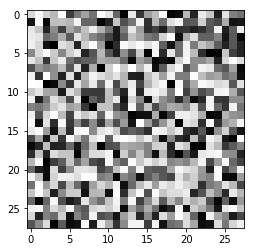

In [36]:
last_image = np.copy(norm_input)
#print(last_image.shape)
last_image = np.squeeze(last_image, axis=0)
print(last_image.shape)
last_image = np.squeeze(last_image, axis=2)
print(last_image.shape)
last_image *= 255
last_image = last_image.astype(int)
plt.imshow(last_image, cmap='Greys')

plt.imshow(random_image, cmap='Greys')

print(random_image[0][0])

print(last_image[0][0])

last_image = np.expand_dims(last_image, 3)
last_image = np.expand_dims(last_image,0)
#print(last_image[0][0])

prediction_result = trained_model.predict(last_image)

print(prediction_result[0])

prediction = trained_model.predict(model_input)

print(prediction[0])

